In [1]:
import vnstock as vn
from datetime import datetime 
from dateutil.relativedelta import relativedelta

import numpy as np
import pandas as pd
import pandas_ta as ta
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.set_style('whitegrid')
plt.style.use("seaborn-v0_8-dark-palette")

In [2]:
df = vn.listing_companies()

In [3]:
df.head()

,ticker,comGroupCode,organName,organShortName,organTypeCode,comTypeCode,icbName,icbNamePath,sector,industry,group,subgroup,icbCode,VN30,VNMID,VN100,VNSML,VNALL,HNX30,VNX50,VNXALL,VNDIAMOND,VNFINLEAD,VNFINSELECT,VNSI,VNCOND,VNCONS,VNENE,VNFIN,VNHEAL,VNIND,VNIT,VNMAT,VNREAL,VNUTI
0,SSI,HOSE,Công ty Cổ phần Chứng khoán SSI,Chứng khoán SSI,DN,CK,Môi giới chứng khoán,Tài chính/Dịch vụ tài chính/Dịch vụ tài chính/...,Tài chính,Dịch vụ tài chính,Dịch vụ tài chính,Môi giới chứng khoán,8777,True,False,True,False,True,False,True,True,False,True,True,False,False,False,False,True,False,False,False,False,False,False
1,BCM,HOSE,Tổng Công ty Đầu tư và Phát triển Công nghiệp ...,Becamex IDC,DN,CT,Bất động sản,Tài chính/Bất động sản/Bất động sản/Bất động sản,Tài chính,Bất động sản,Bất động sản,Bất động sản,8633,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,VHM,HOSE,Công ty Cổ phần Vinhomes,Vinhomes,DN,CT,Bất động sản,Tài chính/Bất động sản/Bất động sản/Bất động sản,Tài chính,Bất động sản,Bất động sản,Bất động sản,8633,True,False,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,VIC,HOSE,Tập đoàn Vingroup - Công ty CP,VinGroup,DN,CT,Bất động sản,Tài chính/Bất động sản/Bất động sản/Bất động sản,Tài chính,Bất động sản,Bất động sản,Bất động sản,8633,True,False,True,False,True,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False
4,VRE,HOSE,Công ty Cổ phần Vincom Retail,Vincom Retail,DN,CT,Bất động sản,Tài chính/Bất động sản/Bất động sản/Bất động sản,Tài chính,Bất động sản,Bất động sản,Bất động sản,8633,True,False,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [4]:
unique_industries = df['industry'].unique()
unique_industries

array(['Dịch vụ tài chính', 'Bất động sản', 'Bảo hiểm',
       'Điện, nước & xăng dầu khí đốt', 'Ngân hàng', 'Tài nguyên Cơ bản',
       'Hóa chất', 'Thực phẩm và đồ uống', 'Du lịch và Giải trí',
       'Bán lẻ', 'Dầu khí', 'Công nghệ Thông tin', 'Viễn thông',
       'Ô tô và phụ tùng', 'Hàng cá nhân & Gia dụng', 'Truyền thông',
       'Y tế', 'Xây dựng và Vật liệu', 'Hàng & Dịch vụ Công nghiệp'],
      dtype=object)

In [5]:
financial_services_companies = df[df['industry'] == 'Dịch vụ tài chính']

unique_financial_icbNames = financial_services_companies['icbName'].unique()

unique_financial_icbNames

array(['Môi giới chứng khoán', 'Quỹ đầu tư', 'Tài chính đặc biệt',
       'Quản lý tài sản', 'Tài chính cá nhân'], dtype=object)

In [6]:
brokerage_companies = df[df['icbName'] == 'Môi giới chứng khoán']

unique_comGroupCodes = brokerage_companies['comGroupCode'].unique()

unique_comGroupCodes

array(['HOSE', 'UPCOM', 'HNX'], dtype=object)

In [7]:
filtered_companies = df[(df['icbName'] == 'Môi giới chứng khoán')]
filtered_companies

,ticker,comGroupCode,organName,organShortName,organTypeCode,comTypeCode,icbName,icbNamePath,sector,industry,group,subgroup,icbCode,VN30,VNMID,VN100,VNSML,VNALL,HNX30,VNX50,VNXALL,VNDIAMOND,VNFINLEAD,VNFINSELECT,VNSI,VNCOND,VNCONS,VNENE,VNFIN,VNHEAL,VNIND,VNIT,VNMAT,VNREAL,VNUTI
0,SSI,HOSE,Công ty Cổ phần Chứng khoán SSI,Chứng khoán SSI,DN,CK,Môi giới chứng khoán,Tài chính/Dịch vụ tài chính/Dịch vụ tài chính/...,Tài chính,Dịch vụ tài chính,Dịch vụ tài chính,Môi giới chứng khoán,8777,True,False,True,False,True,False,True,True,False,True,True,False,False,False,False,True,False,False,False,False,False,False
55,ABW,UPCOM,Công ty Cổ phần Chứng khoán An Bình,Chứng khoán An Bình,DN,CK,Môi giới chứng khoán,Tài chính/Dịch vụ tài chính/Dịch vụ tài chính/...,Tài chính,Dịch vụ tài chính,Dịch vụ tài chính,Môi giới chứng khoán,8777,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
56,AGR,HOSE,Công ty Cổ phần Chứng khoán AGRIBANK,Agriseco,DN,CK,Môi giới chứng khoán,Tài chính/Dịch vụ tài chính/Dịch vụ tài chính/...,Tài chính,Dịch vụ tài chính,Dịch vụ tài chính,Môi giới chứng khoán,8777,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False
57,APG,HOSE,Công ty Cổ phần Chứng khoán APG,Chứng khoán APG,DN,CK,Môi giới chứng khoán,Tài chính/Dịch vụ tài chính/Dịch vụ tài chính/...,Tài chính,Dịch vụ tài chính,Dịch vụ tài chính,Môi giới chứng khoán,8777,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False
58,APS,HNX,Công ty Cổ phần Chứng khoán Châu Á - Thái Bình...,CK Châu Á - TBD,DN,CK,Môi giới chứng khoán,Tài chính/Dịch vụ tài chính/Dịch vụ tài chính/...,Tài chính,Dịch vụ tài chính,Dịch vụ tài chính,Môi giới chứng khoán,8777,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
60,BMS,UPCOM,Công ty Cổ phần Chứng khoán Bảo Minh,Chứng khoán Bảo Minh,DN,CK,Môi giới chứng khoán,Tài chính/Dịch vụ tài chính/Dịch vụ tài chính/...,Tài chính,Dịch vụ tài chính,Dịch vụ tài chính,Môi giới chứng khoán,8777,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
61,BSI,HOSE,Công ty Cổ phần Chứng khoán BIDV,Chứng khoán BIDV,DN,CK,Môi giới chứng khoán,Tài chính/Dịch vụ tài chính/Dịch vụ tài chính/...,Tài chính,Dịch vụ tài chính,Dịch vụ tài chính,Môi giới chứng khoán,8777,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False
62,BVS,HNX,Công ty Cổ phần Chứng khoán Bảo Việt,Chứng khoán Bảo Việt,DN,CK,Môi giới chứng khoán,Tài chính/Dịch vụ tài chính/Dịch vụ tài chính/...,Tài chính,Dịch vụ tài chính,Dịch vụ tài chính,Môi giới chứng khoán,8777,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
64,CTS,HOSE,Công ty Cổ phần Chứng khoán Ngân hàng Công thư...,Chứng khoán Vietinbank,DN,CK,Môi giới chứng khoán,Tài chính/Dịch vụ tài chính/Dịch vụ tài chính/...,Tài chính,Dịch vụ tài chính,Dịch vụ tài chính,Môi giới chứng khoán,8777,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False
65,DSC,UPCOM,Công ty Cổ phần Chứng khoán DSC,Chứng khoán DSC,DN,CK,Môi giới chứng khoán,Tài chính/Dịch vụ tài chính/Dịch vụ tài chính/...,Tài chính,Dịch vụ tài chính,Dịch vụ tài chính,Môi giới chứng khoán,8777,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
stocklist = filtered_companies.ticker
stockname = filtered_companies.organShortName

In [9]:
stock_list = stocklist.tolist()
print(stock_list)
print(len(stock_list))
stock_string = ', '.join(stock_list)
print(stock_string)


['SSI', 'ABW', 'AGR', 'APG', 'APS', 'BMS', 'BSI', 'BVS', 'CTS', 'DSC', 'ART', 'FTS', 'AAS', 'HBS', 'HCM', 'HAC', 'IVS', 'EVS', 'ORS', 'CSI', 'PHS', 'PSI', 'SBS', 'SHS', 'TCI', 'MBS', 'TVB', 'TVS', 'VCI', 'VDS', 'VFS', 'VUA', 'VIG', 'VIX', 'VND', 'WSS']
36
SSI, ABW, AGR, APG, APS, BMS, BSI, BVS, CTS, DSC, ART, FTS, AAS, HBS, HCM, HAC, IVS, EVS, ORS, CSI, PHS, PSI, SBS, SHS, TCI, MBS, TVB, TVS, VCI, VDS, VFS, VUA, VIG, VIX, VND, WSS


In [10]:
compare_data = vn.stock_ls_analysis(stock_string).T.reset_index()
compare_data

,Mã CP,Vốn hóa (tỷ),Giá,Số phiên tăng/giảm liên tiếp,P/E,PEG,P/B,EV/EBITDA,Cổ tức,ROE,ROA,Thanh toán hiện hành,Thanh toán nhanh,Nợ/Vốn CSH,Nợ/EBITDA,Doanh thu quý gần nhất,RSI,RS
0,ABW,1019,11807,0,28.1,0.6,0.9,17.7,0.0,0.033,0.02,1.8,1.8,0.6,6.9,0.459,48.9,51.0
1,APS,540,6500,0,-1.7,0.0,0.7,-0.8,0.0,-0.336,-0.33,56.0,56.0,0.0,0.0,-0.801,42.8,3.0
2,ART,126,16300,0,46.6,0.0,1.4,2.8,0.0,0.03,0.029,81.0,81.0,0.0,0.0,0.038,0.0,34.0
3,BSI,10382,51200,-1,28.8,0.3,2.3,21.8,0.0,0.081,0.046,2.2,2.2,0.7,4.9,0.22,67.2,96.0
4,CSI,495,29456,-1,572.6,-7.9,2.7,61.6,0.0,0.005,0.005,154.6,154.6,0.0,0.0,-0.016,39.4,8.0
5,CTS,4223,28400,-2,27.9,-0.7,2.1,19.0,0.0,0.078,0.022,1.3,1.3,2.8,9.0,-0.325,53.3,74.0
6,DSC,4108,20055,1,37.4,0.2,1.9,21.0,0.0,0.067,0.037,2.2,2.2,0.8,5.4,-0.029,64.3,68.0
7,EVS,1368,8300,-1,36.3,-0.7,0.7,20.7,0.0,0.019,0.016,5.7,5.7,0.1,3.0,-0.117,43.7,51.0
8,FTS,9666,45050,-1,19.6,0.9,2.7,18.7,0.0,0.144,0.073,1.9,1.9,0.7,2.9,0.251,57.1,78.0
9,HBS,261,7900,0,16.0,0.2,0.6,12.2,0.0,0.04,0.04,109.1,109.1,0.0,0.0,-0.304,44.4,11.0


In [11]:
vn.industry_analysis("VCI").T.reset_index()

,Mã CP,Vốn hóa (tỷ),Giá,Số phiên tăng/giảm liên tiếp,P/E,PEG,P/B,EV/EBITDA,Cổ tức,ROE,ROA,Thanh toán hiện hành,Thanh toán nhanh,Biên LNG,Biên LNST,Nợ/Vốn CSH,Nợ/EBITDA,LNST 5 năm,Doanh thu 5 năm,LNST quý gần nhất,Doanh thu quý gần nhất,LNST năm tới,Doanh thu năm tới,RSI,rs
0,VCI,18463,42200,4,46.5,-0.7,2.5,20.9,0.0,0.057,0.024,1.8,1.8,0.597,0.268,1.2,6.2,0.058,0.155,0.531,0.331,-0.384,-0.29,52.4,69.0
1,SSI,50521,33700,-1,25.1,-1.6,2.2,19.8,0.0,0.09,0.04,1.6,1.6,0.664,0.366,1.3,6.4,0.079,0.169,0.263,0.156,0.308,0.08,56.8,69.0
2,VND,26427,21700,-2,22.7,-0.5,1.7,14.9,0.0,0.077,0.028,1.6,1.6,0.704,0.363,1.4,6.4,0.205,0.411,0.49,0.097,0.349,-0.09,48.0,48.0
3,HCM,18407,24400,-2,27.3,-1.3,2.2,NaN,0.0,0.083,0.04,1.8,1.8,0.386,0.208,1.1,9.2,0.0,0.043,-0.163,0.046,-0.261,-0.28,60.7,70.0
4,SHS,14962,18400,-1,28.6,-2.5,1.5,18.9,0.0,0.053,0.047,17.0,17.0,0.572,0.411,0.0,0.7,-0.152,0.072,0.41,0.568,2.125,0.08,48.5,62.0
5,VIX,11615,17350,-1,17.3,1.0,1.3,11.4,0.0,0.081,0.079,98.1,98.1,0.79,0.617,0.0,0.0,0.318,0.251,-0.648,-0.53,1.912,0.35,57.2,82.0
6,BSI,10382,51200,-1,28.8,0.3,2.3,21.8,0.0,0.081,0.046,2.2,2.2,0.616,0.318,0.7,4.9,-0.085,0.139,-0.007,0.22,2.704,0.35,67.2,96.0
7,MBS,10241,23400,-2,17.5,1.3,2.0,15.7,0.0,0.123,0.045,1.5,1.5,0.696,0.32,1.9,6.7,0.269,0.118,0.04,0.001,0.143,-0.07,57.0,70.0
8,FTS,9666,45050,-1,19.6,0.9,2.7,18.7,0.0,0.144,0.073,1.9,1.9,0.71,0.565,0.7,2.9,0.122,0.219,0.311,0.251,0.486,0.24,57.1,78.0
9,ORS,4590,15300,3,29.4,-1.4,1.9,6.4,0.0,0.065,0.023,4.4,4.4,0.311,0.094,0.3,0.9,NaN,1.733,-0.005,-0.094,0.471,0.05,61.2,84.0


In [12]:
vonnhoa_list = []
p_b_list = []
roe_list = []
for stock_code in stock_list:
   
    d = vn.industry_analysis(stock_code).T.reset_index()
    vonnhoa = d[(d["Mã CP"] == stock_code)]["Vốn hóa (tỷ)"].values[0]
    p_b = d[(d["Mã CP"] == stock_code)]["P/B"].values[0]
    roe = d[(d["Mã CP"] == stock_code)]["ROE"].values[0]
  
    vonnhoa_list.append(vonnhoa) 
    p_b_list.append(p_b)
    roe_list.append(roe)

In [13]:
dfr = pd.DataFrame({'Mã CP': stock_list, 
                    'Vốn hóa (tỷ)': vonnhoa_list, 
                    'P/B': p_b_list,
                    'ROE': roe_list
                   })
dfr

,Mã CP,Vốn hóa (tỷ),P/B,ROE
0,SSI,50521.0,2.2,0.090
1,ABW,1019.0,0.9,0.033
2,AGR,3543.0,1.4,0.059
3,APG,1959.0,1.2,-0.034
4,APS,540.0,0.7,-0.336
5,BMS,692.0,0.8,0.058
6,BSI,10382.0,2.3,0.081
7,BVS,1856.0,0.8,0.081
8,CTS,4223.0,2.1,0.078
9,DSC,4108.0,1.9,0.067


In [14]:
dfr = dfr.dropna()
print(len(dfr))

34


Đối tượng nghiên cứu của tôi là các công ty “Môi giới chứng khoán” trong lĩnh vực 
“Dịch vụ tài chính”. Tổng cộng có 34 mã cổ phiếu ở trên cả 3 sàn “HOSE”, “HNX” và 
“UPCOM”.

Mở đầu áp dụng các phương pháp nghiên cứu của tôi, tôi sẽ chia các đội tƣợng mã cổ 
phiếu mà tôi nghiên cứu thành 3 nhóm theo vốn hoá của từng công ty:
- Vốn hóa cao: trên 10.000 tỷ đồng
- Vốn hóa vừa: từ 1.000 tỷ đồng đến 10.000 tỷ đồng
- Vốn hóa thấp: duới 1.000 tỷ đồng



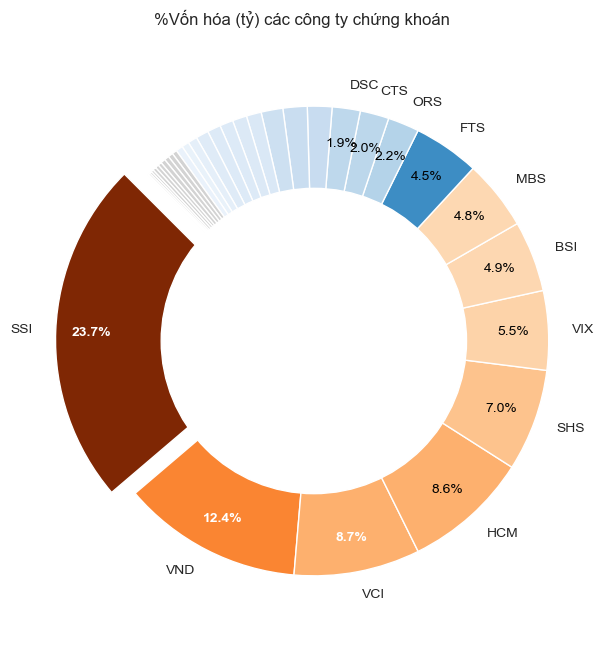

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Hàm xác định màu sắc
def assign_color(value):
    if value > 10000:
        return plt.cm.Oranges(value / 50000)  # Sử dụng colormap 'Oranges'
    elif 1000 < value <= 10000:
        return plt.cm.Blues(value / 15000)  # Sử dụng colormap 'Greens'
    elif value <= 1000:
        return 'lightgray'

# Hàm tùy chỉnh để hiển thị phần trăm
def custom_autopct(pct):
    return ('%1.1f%%' % pct) if pct > 1.8 else ''

# Sắp xếp dữ liệu từ lớn đến bé
dfr_sorted = dfr.sort_values(by='Vốn hóa (tỷ)', ascending=False)

# Tạo một cột mới 'color' dựa trên 'Vốn hóa (tỷ)'
dfr_sorted['color'] = dfr_sorted['Vốn hóa (tỷ)'].apply(assign_color)

labels = ['' if i >= 12 else v for i, v in enumerate(dfr_sorted["Mã CP"])]

# Tạo danh sách explode
explode = [0.1 if i == 0 else 0 for i in range(len(dfr_sorted))]

# Vẽ biểu đồ pie chart
plt.figure(figsize=(7, 8))  # Đặt kích thước hình vẽ thành 10x10
patches, texts, autotexts = plt.pie(dfr_sorted["Vốn hóa (tỷ)"], 
                                    labels=labels, 
                                    autopct=custom_autopct, startangle=135, 
                                    colors=dfr_sorted['color'], explode=explode, pctdistance=0.85)

# Vẽ một vòng tròn trắng ở giữa
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.title('%Vốn hóa (tỷ) các công ty chứng khoán')

# Đặt màu cho phần trăm
for i, autotext in enumerate(autotexts):
    if i < 3:
        autotext.set_color('white')
        autotext.set_weight('bold')
    else:
        autotext.set_color('black')

#output_file_path = '%Vốn_hoá.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')

plt.show()


Các công ty có vốn hoá cao bao gồm SSI đến MBS mang màu cam từ đậm đến nhạt, các công ty vốn hoá vừa mang màu xanh, các công ty còn lại mang màu xám. 

Ta thấy các công vốn hoá lớn chiếm tỷ trọng lớn đối tổng vốn hoá các công ty môi giới chứng khoán và đặc biệt công ty SSI chiếm tỷ trọng % vốn hoá cao nhất với 23.7% tổng vốn hoá , lớn gần gấp 2 lần công ty VNDirect xếp ở vị trí thứ 2.

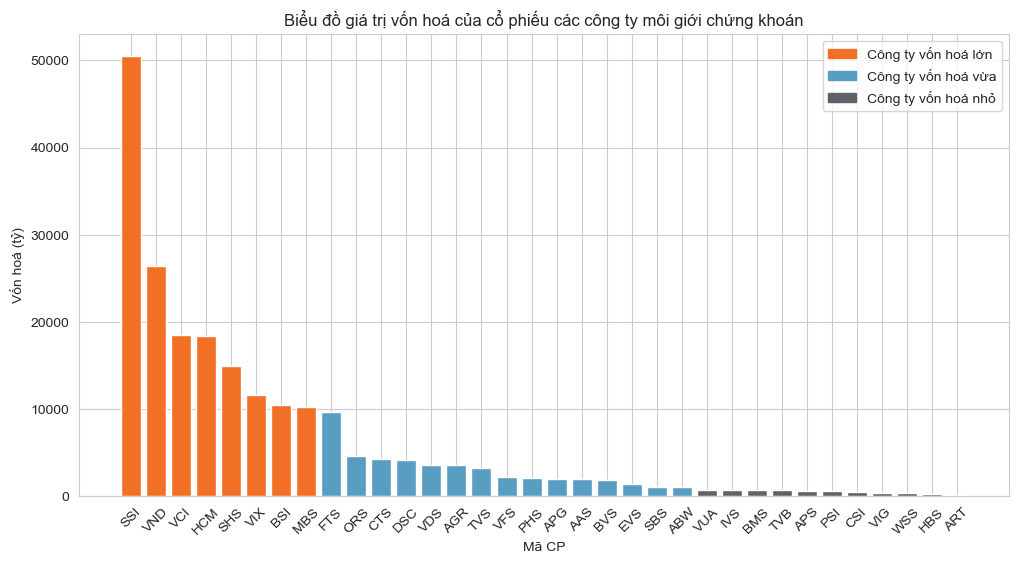

<Figure size 1920x1440 with 0 Axes>

In [16]:
# Hàm xác định màu sắc
def assign_color(value):
    if value > 10000:
        return '#F17026'  # Màu cam nếu vốn hoá > 10000
    elif 1000 < value <= 10000:
        return '#5A9DC2'  # Màu xanh nếu vốn hoá lớn hơn 1000 nhỏ hơn 10000
    else:
        return '#606068'  # Màu xám cho các giá trị còn lại

# Tạo một cột mới 'color' dựa trên 'Vốn hóa (tỷ)'
dfr_sorted['color'] = dfr_sorted['Vốn hóa (tỷ)'].apply(assign_color)

fig, ax = plt.subplots(figsize=(12, 6))

# Vẽ biểu đồ bar với màu sắc tương ứng
bar1 = ax.bar(dfr_sorted['Mã CP'], dfr_sorted['Vốn hóa (tỷ)'], label='Vốn hoá (tỷ)', color=dfr_sorted['color'])

ax.set_ylabel('Vốn hoá (tỷ)')
ax.set_xlabel('Mã CP')
ax.set_title('Biểu đồ giá trị vốn hoá của cổ phiếu các công ty môi giới chứng khoán')
ax.set_xticks(dfr_sorted['Mã CP'])
ax.set_xticklabels(dfr_sorted['Mã CP'], rotation=45)
ax.tick_params(axis='x', labelsize=10)

# Tạo các phần tử giả lập để tạo chú thích
import matplotlib.patches as mpatches

orange_patch = mpatches.Patch(color='#F17026', label='Công ty vốn hoá lớn')
green_patch = mpatches.Patch(color='#5A9DC2', label='Công ty vốn hoá vừa')
gray_patch = mpatches.Patch(color='#606068', label='Công ty vốn hoá nhỏ')

# Đặt chú thích ở dưới bên phải
plt.legend(handles=[orange_patch, green_patch, gray_patch], loc='upper right')

#output_file_path = 'Bar_chart_Vốn_hoá.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=300)
plt.show()

Dựa vào 2 biểu đồ trên, ta thấy 9 mã cổ phiếu đầu tiên có lƣợng vốn hoá hơn hẳn các 
mã cổ phiếu khác, vì vậy khi định giá và phân thì cá nhân tôi sẽ chú tâm vào những cổ 
phiếu này hơn và so sánh các cổ phiếu này với nhau.

# 1.1 Áp dụng phương pháp định giá tuơng đối

## 1.1.1 Phân tích ngang hàng ( Peer Analysis ):


### Ngành nghề, lĩnh vực kinh doanh:

In [17]:
mean_p_b = dfr["P/B"].mean()
print(mean_p_b)


1.5205882352941178


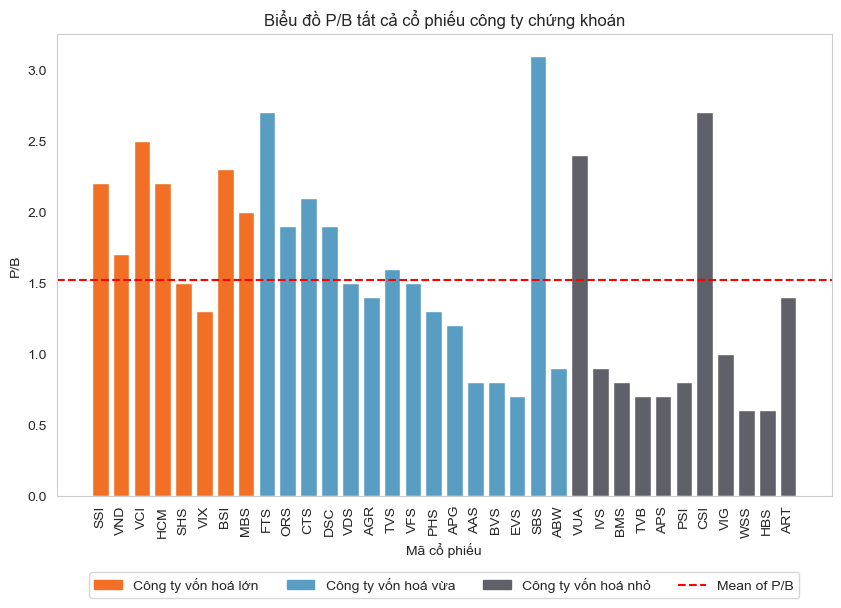

<Figure size 1920x1440 with 0 Axes>

In [18]:
# Lọc DataFrame để chỉ giữ lại các hàng có ROE dương
#dfr_sorted_positive_roe = dfr_sorted.loc[dfr_sorted['ROE'] > 0]

# Hàm xác định màu sắc
def assign_color(value):
    if value > 10000:
        return '#F17026'  # Màu cam nếu vốn hoá > 10000
    elif 1000 < value <= 10000:
        return '#5A9DC2'  # Màu xanh nếu vốn hoá lớn hơn 1000 nhỏ hơn 10000
    else:
        return '#606068'  # Màu xám cho các giá trị còn lại

# Tạo một cột mới 'color' dựa trên 'Vốn hóa (tỷ)'
dfr_sorted['color'] = dfr_sorted['Vốn hóa (tỷ)'].apply(assign_color)

plt.figure(figsize=(10, 6))
plt.bar(dfr_sorted["Mã CP"], dfr_sorted["P/B"], 
        label="P/B", color=dfr_sorted['color'])
mean_pb_line = plt.axhline(y=dfr_sorted["P/B"].mean(), 
                           color='r', linestyle='--', 
                           label="Mean of P/B")

plt.xlabel("Mã cổ phiếu")
plt.ylabel("P/B")
plt.title("Biểu đồ P/B tất cả cổ phiếu công ty chứng khoán")
plt.xticks(rotation=90)
plt.grid()

# Tạo các phần tử giả lập để tạo chú thích
import matplotlib.patches as mpatches

orange_patch = mpatches.Patch(color='#F17026', label='Công ty vốn hoá lớn')
green_patch = mpatches.Patch(color='#5A9DC2', label='Công ty vốn hoá vừa')
gray_patch = mpatches.Patch(color='#606068', label='Công ty vốn hoá nhỏ')

# Đặt chú thích ở giữa bên dưới trục x
plt.legend(handles=[orange_patch, green_patch, gray_patch, mean_pb_line], 
           loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

#output_file_path = 'bar_pb_all.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=300)
plt.show()

Ta thấy 17 mã cổ phiếu đầu được lọc theo độ lớn vốn hoá có giá trị P/B ổn định hơn các cổ phiếu còn lại.

Các cổ phiếu có vốn hoá nhỏ thường có giá trị P/B khá cực đoan, quá lớn hoặc quá nhỏ so với giá trị trung bình ngành

Các công ty vốn hóa nhỏ thường gặp nhiều vấn đề làm cho giá trị P/B cực đoan:
- Đối mặt với mức độ rủi ro tài chính cao hơn, làm giảm sự tin cậy của nhà đầu tư và yêu cầu mức giá thấp hơn để đầu tư 
- Khả năng tăng trưởng hạn chế cũng có thể làm giảm giá trị dự kiến của công ty, đặt ra câu hỏi về khả năng sinh lời trong tương lai và làm giảm giá trị P/B. 
- Sự khó khăn trong thu hút đầu tư, đặc biệt là khi có thị trường giao dịch thấp, cũng có thể làm giảm giá trị P/B, vì nhà đầu tư thường yêu cầu mức giá thấp hơn khi đối mặt với các công ty không có độ tin cậy tài chính cao. 
- Một doanh nghiệp sở hữu số nợ lớn sẽ vô tình khiến cho giá trị ghi sổ ở mức thấp, dẫn tới chỉ số P/B sẽ cao. Việc sử dụng đòn bẩy tài chính ở mức cao sẽ mang lại những rủi ro lớn cho doanh nghiệp. Thậm chí, nếu tỷ suất lợi nhuận doanh nghiệp tạo ra thấp hơn chi phí sử dụng vốn thì khi đó, giá trị doanh nghiệp sẽ suy giảm.

Những yếu tố này thường phản ánh sự không chắc chắn và rủi ro cao trong việc đầu tư vào các công ty có vốn hóa nhỏ.


### Quy mô vốn hoá:

In [19]:
dfr_sorted_positive_roe = dfr_sorted.loc[dfr_sorted['ROE'] > 0]

In [20]:
dfr_top9 = dfr_sorted_positive_roe.head(9).reset_index()
dfr_top9

,index,Mã CP,Vốn hóa (tỷ),P/B,ROE,color
0,0,SSI,50521.0,2.2,0.090,#F17026
1,34,VND,26427.0,1.7,0.077,#F17026
2,28,VCI,18463.0,2.5,0.057,#F17026
3,14,HCM,18407.0,2.2,0.083,#F17026
4,23,SHS,14962.0,1.5,0.053,#F17026
5,33,VIX,11615.0,1.3,0.081,#F17026
6,6,BSI,10382.0,2.3,0.081,#F17026
7,25,MBS,10241.0,2.0,0.123,#F17026
8,11,FTS,9666.0,2.7,0.144,#5A9DC2


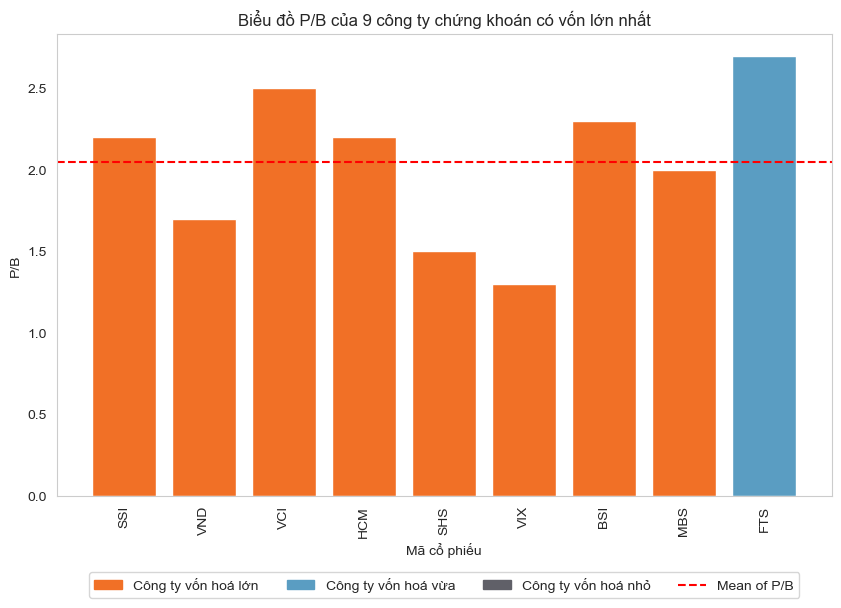

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(dfr_top9["Mã CP"], dfr_top9["P/B"], 
        label="P/B", color= dfr_top9['color'])
mean_pb_line = plt.axhline(y=dfr_top9["P/B"].mean(), color='r', linestyle='--', label="Mean of P/B")

plt.xlabel("Mã cổ phiếu", fontsize = 10)
plt.ylabel("P/B")
plt.title("Biểu đồ P/B của 9 công ty chứng khoán có vốn lớn nhất")
plt.xticks(rotation=90)
plt.grid()

# Tạo các phần tử giả lập để tạo chú thích
import matplotlib.patches as mpatches

orange_patch = mpatches.Patch(color='#F17026', label='Công ty vốn hoá lớn')
green_patch = mpatches.Patch(color='#5A9DC2', label='Công ty vốn hoá vừa')
gray_patch = mpatches.Patch(color='#606068', label='Công ty vốn hoá nhỏ')

# Đặt chú thích ở giữa bên dưới trục x
plt.legend(handles=[orange_patch, green_patch, gray_patch, mean_pb_line], 
           loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

#output_file_path = 'bar_pb_top_9.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')

plt.show()


Trong 9 công ty có vốn hoá lớn nhất, 4 mã cổ phiếu VND, SHS, MBS, VIX có giá trị P/B nhỏ hơn giá trị trung bình P/B của 9 mã cổ phiếu này. Điều đó có nghĩa 4 mã cổ phiếu trên được định giá thấp hơn trung bình của các công ty chiếm tỷ trọng vốn hoá lớn.

### Phân tích so sánh tỷ lệ P/B và tỷ lệ ROE của các cổ phiếu:


Thông thường, tỷ lệ ROE và tỷ lệ P/B có mỗi quan hệ tuyến tính với nhau nhưng trong tập dữ liệu nghiên cứu của tôi có một vài mã có tỷ lệ ROE âm và các mã cổ phiếu đó 
có giá trị P/B cực đoan ( Outliers ) làm ảnh hưởng đến mỗi quan hệ tuyến tính của tập dữ liệu. 

Vì vậy để có thể đối chiếu P/B và ROE thì tôi sẽ loại bỏ các mã có tỷ lệ ROE âm ở thời điểm hiện tại ( ngày 22 tháng 1 năm 2024)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10024\520957609.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr_positive_roe['color'] = dfr_positive_roe['Vốn hóa (tỷ)'].apply(assign_color)


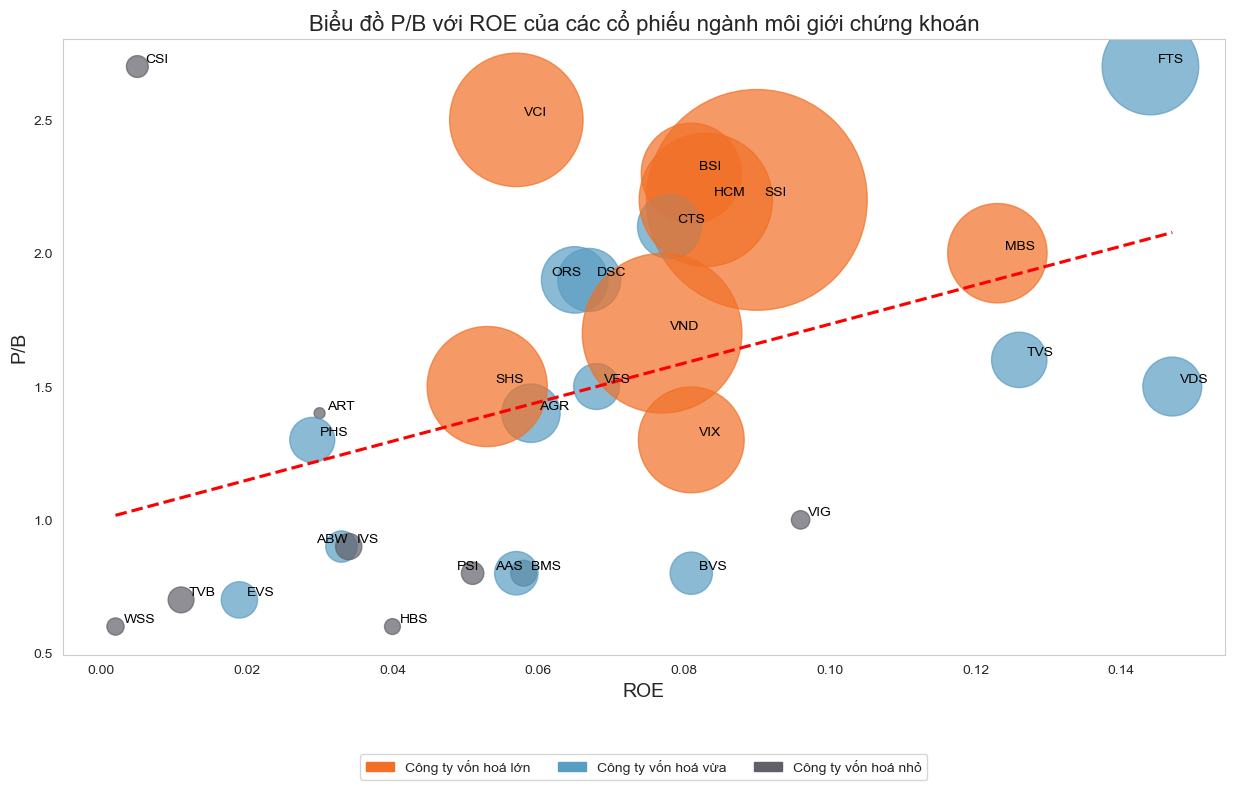

<Figure size 3840x2880 with 0 Axes>

In [22]:
# Lọc DataFrame để chỉ giữ lại các hàng có ROE dương
dfr_positive_roe = dfr.loc[dfr['ROE'] > 0]

# Hàm xác định màu sắc
def assign_color(value):
    if value > 10000:
        return '#F17026'  # Màu cam nếu vốn hoá > 10000
    elif 1000 < value <= 10000:
        return '#5A9DC2'  # Màu xanh nếu vốn hoá lớn hơn 1000 nhỏ hơn 10000
    else:
        return '#606068'  # Màu xám cho các giá trị còn lại

# Tạo một cột mới 'color' dựa trên 'Vốn hóa (tỷ)'
dfr_positive_roe['color'] = dfr_positive_roe['Vốn hóa (tỷ)'].apply(assign_color)

from adjustText import adjust_text

# Scatter plot with regression line (without confidence interval), size by log(Market Cap)
plt.figure(figsize=(15, 8))

# Use plt.scatter to create the scatter plot with custom colors
plt.scatter(x=dfr_positive_roe['ROE'], y=dfr_positive_roe['P/B'], 
            s=dfr_positive_roe['Vốn hóa (tỷ)']/2, alpha=0.7, 
            c=dfr_positive_roe['color'])

# Use sns.regplot to add the regression line
sns.regplot(x='ROE', y='P/B', data=dfr_positive_roe, 
            scatter=False, 
            line_kws={'color': 'red', 'linestyle': '--'}, ci=None)

texts = []
for index, row in dfr_positive_roe.iterrows():
    texts.append(plt.text(row['ROE'] + 0.001, row['P/B'], row['Mã CP'],
                      horizontalalignment='left', size='medium', color='black'))

adjust_text(texts)

plt.xlabel('ROE', fontsize=14)
plt.ylabel('P/B', fontsize=14)
plt.title('Biểu đồ P/B với ROE của các cổ phiếu ngành môi giới chứng khoán', fontsize=16)
plt.grid()

# Tạo các phần tử giả lập để tạo chú thích
import matplotlib.patches as mpatches

orange_patch = mpatches.Patch(color='#F17026', label='Công ty vốn hoá lớn')
green_patch = mpatches.Patch(color='#5A9DC2', label='Công ty vốn hoá vừa')
gray_patch = mpatches.Patch(color='#606068', label='Công ty vốn hoá nhỏ')

# Đặt chú thích ở giữa bên dưới trục x
plt.legend(handles=[orange_patch, green_patch, gray_patch], 
           loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

#output_file_path = 'scatter_reg_line_pb_roe.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=600)
plt.show()



Biểu đồ trên là biểu đồ phân tán kết hợp với mô hình hồi quy tuyến tính và độ lớn kích thước các vòng tròn đại diện cho độ lớn vốn hoá của từng công ty. Qua biểu đồ tổng quát tất cả các cổ phiếu, ta thấy 3 cổ phiếu tiềm năng là VIX, BVS, TVS, VDS. 

Cổ phiếu TVS, VDS có tỷ lệ ROE cao cho thấy công ty đó đang quản lý và sử dụng hiệu quả nguồn vốn của mình trong quý vừa rồi và có giá trị thấp hơn đường bình phương nhỏ nhất OLS (Ordinary Least Squares), đường đi qua các điểm sao cho tổng bình phương khoảng cách các điểm với đường đó là nhỏ nhất, cho thấy TVS và VDS đang được định giá thấp hơn so với ngành. Đặc biệt ta có cổ phiếu công ty lớn VIX cũng đang được định giá thấp hơn so với ngành.

Tương tự biểu đồ trên, ta đối chiếu các tỷ lệ ROE và tỷ lệ P/B với các công ty chiếm tỷ trọng lớn trong tổng giá trị vốn hoá của ngành.

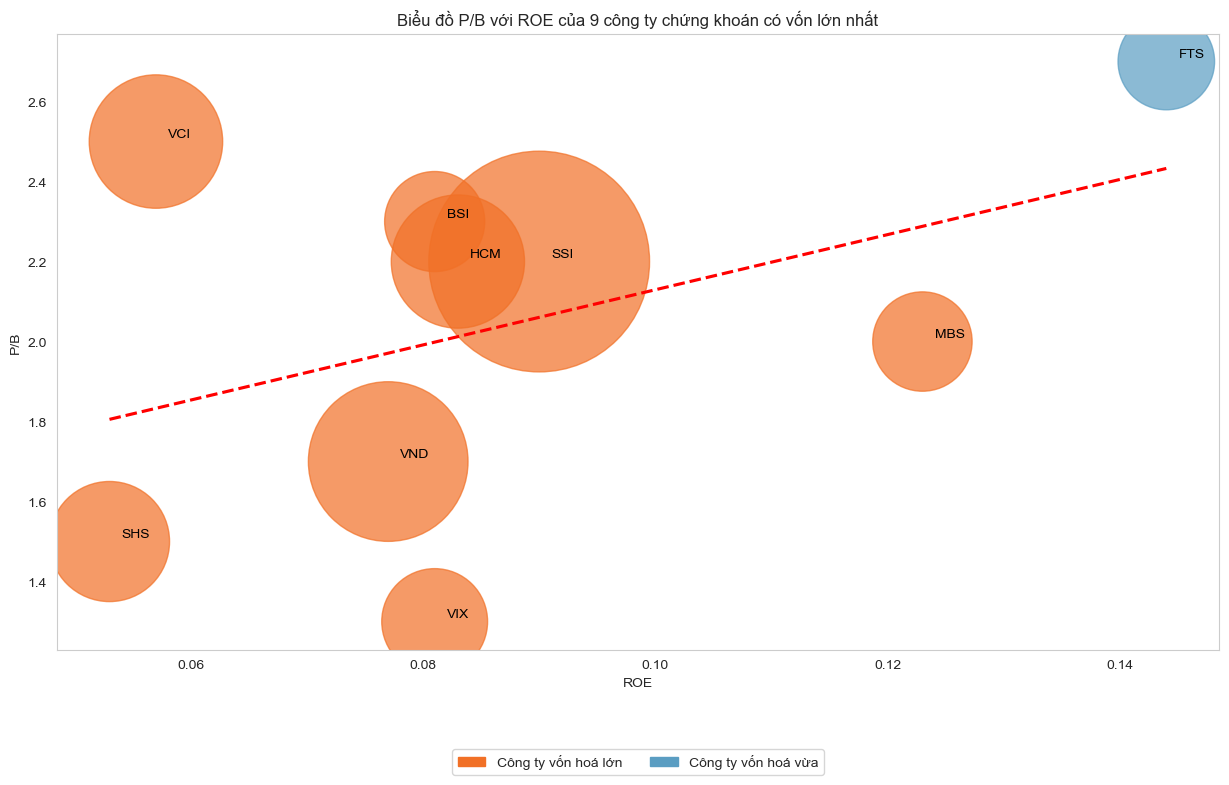

<Figure size 3840x2880 with 0 Axes>

In [23]:
from adjustText import adjust_text

# Scatter plot with regression line (without confidence interval), size by log(Market Cap)
plt.figure(figsize=(15, 8))

# Use plt.scatter to create the scatter plot with custom colors
plt.scatter(x=dfr_top9['ROE'], y=dfr_top9['P/B'], 
            s=dfr_top9['Vốn hóa (tỷ)']/2, alpha=0.7, 
            c=dfr_top9['color'])

# Use sns.regplot to add the regression line
sns.regplot(x='ROE', y='P/B', data=dfr_top9, 
            scatter=False, 
            line_kws={'color': 'red', 'linestyle': '--'}, ci=None)

texts = []
for index, row in dfr_top9.iterrows():
    texts.append(plt.text(row['ROE'] + 0.001, row['P/B'], row['Mã CP'],
                      horizontalalignment='left', size='medium', color='black'))

adjust_text(texts)

plt.xlabel('ROE')
plt.ylabel('P/B')
plt.title('Biểu đồ P/B với ROE của 9 công ty chứng khoán có vốn lớn nhất')
plt.grid()

# Tạo các phần tử giả lập để tạo chú thích
import matplotlib.patches as mpatches

orange_patch = mpatches.Patch(color='#F17026', label='Công ty vốn hoá lớn')
green_patch = mpatches.Patch(color='#5A9DC2', label='Công ty vốn hoá vừa')

# Đặt chú thích ở giữa bên dưới trục x
plt.legend(handles=[orange_patch, green_patch], 
           loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

#output_file_path = 'scatter_reg_pb_top_9.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=600)
plt.show()



Ta thấy trong 9 công ty trên, cổ phiếu SHS, VND, VIX, MBS đang được định giá thấp hơn trung bình và rõ ràng nhất là cổ phiếu VIX.

### Phân tích giá trị quá khứ của tỷ lệ P/B:


Dựa theo các kết quả phân tích theo chiều ngang, cá nhân tôi thấy có 7 mã cổ phiếu 
tiềm năng VIX, VND, SHS, MBS, TVS, VDS, BVS.

Dưới đây tôi sẽ lấy 7 mã cổ phiếu này so sánh giá trị P/B hiện tại và P/B ở quá khứ để xem giá cổ phiếu đang rẻ hay 
mắc so trung bình 5 năm.

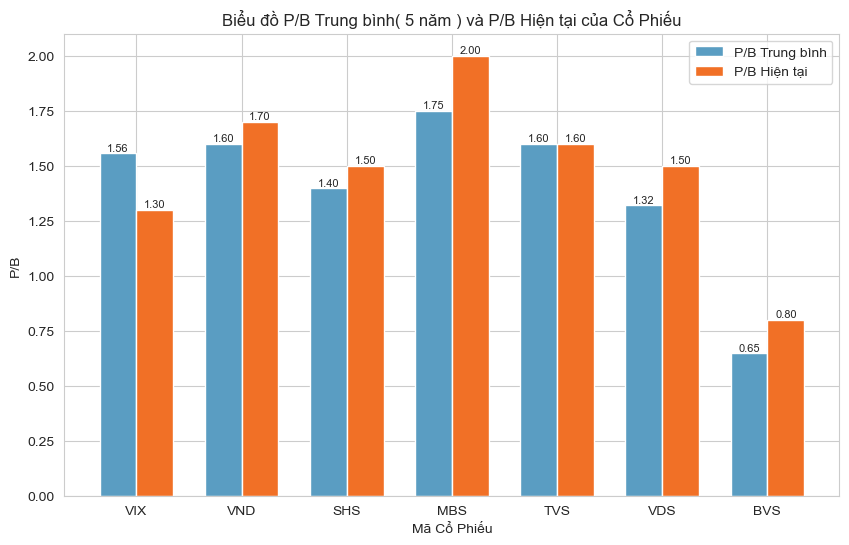

In [24]:
last_stock_list = ["VIX", "VND","SHS", "MBS","TVS", "VDS", "BVS" ]

data_vix = vn.stock_evaluation (symbol='VIX', period=5, time_window='Y')
data_vnd = vn.stock_evaluation (symbol='VND', period=5, time_window='Y')
data_shs = vn.stock_evaluation (symbol='SHS', period=5, time_window='Y')
data_mbs = vn.stock_evaluation (symbol='MBS', period=5, time_window='Y')
data_tvs = vn.stock_evaluation (symbol='TVS', period=5, time_window='Y')
data_vds = vn.stock_evaluation (symbol='VDS', period=5, time_window='Y')
data_bvs = vn.stock_evaluation (symbol='BVS', period=5, time_window='Y')

avg_pb_vix = data_vix['PB'].mean()
avg_pb_vnd = data_vnd['PB'].mean()
avg_pb_shs = data_shs['PB'].mean()
avg_pb_mbs = data_mbs['PB'].mean()
avg_pb_tvs = data_tvs['PB'].mean()
avg_pb_vds = data_vds['PB'].mean()
avg_pb_bvs = data_bvs['PB'].mean()



# Mã cổ phiếu và giá trị P/B tương ứng
avg_pbs = [avg_pb_vix, avg_pb_vnd, 
           avg_pb_shs, 
           avg_pb_mbs, avg_pb_tvs, 
           avg_pb_vds, avg_pb_bvs]
current_pbs = [ data_vix['PB'].iloc[-1], data_vnd['PB'].iloc[-1], 
               data_shs['PB'].iloc[-1],
               data_mbs['PB'].iloc[-1], data_tvs['PB'].iloc[-1],
               data_vds['PB'].iloc[-1], data_bvs['PB'].iloc[-1]]

# Số lượng mã cổ phiếu
num_stocks = len(last_stock_list)

# Vị trí của mỗi mã cổ phiếu trên biểu đồ
x = range(num_stocks)

# Độ rộng của các cột
width = 0.35

# Tạo biểu đồ
fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ cột cho P/B trung bình
avg_bar = ax.bar(x, avg_pbs, width, label='P/B Trung bình', color='#5A9DC2')

# Vị trí cho cột P/B hiện tại
current_x = [i + width for i in x]

# Vẽ cột cho P/B hiện tại
current_bar = ax.bar(current_x, current_pbs, 
                     width, label='P/B Hiện tại', 
                     color='#F17026')

# Đặt tên cho các cột
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(last_stock_list)
ax.set_xlabel('Mã Cổ Phiếu')
ax.set_ylabel('P/B')
ax.set_title('Biểu đồ P/B Trung bình( 5 năm ) và P/B Hiện tại của Cổ Phiếu')
ax.legend()

# Hiển thị giá trị trên các cột
for bar in avg_bar + current_bar:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=8)

#output_file_path = 'pb_mean_pb_5_year.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')

plt.show()


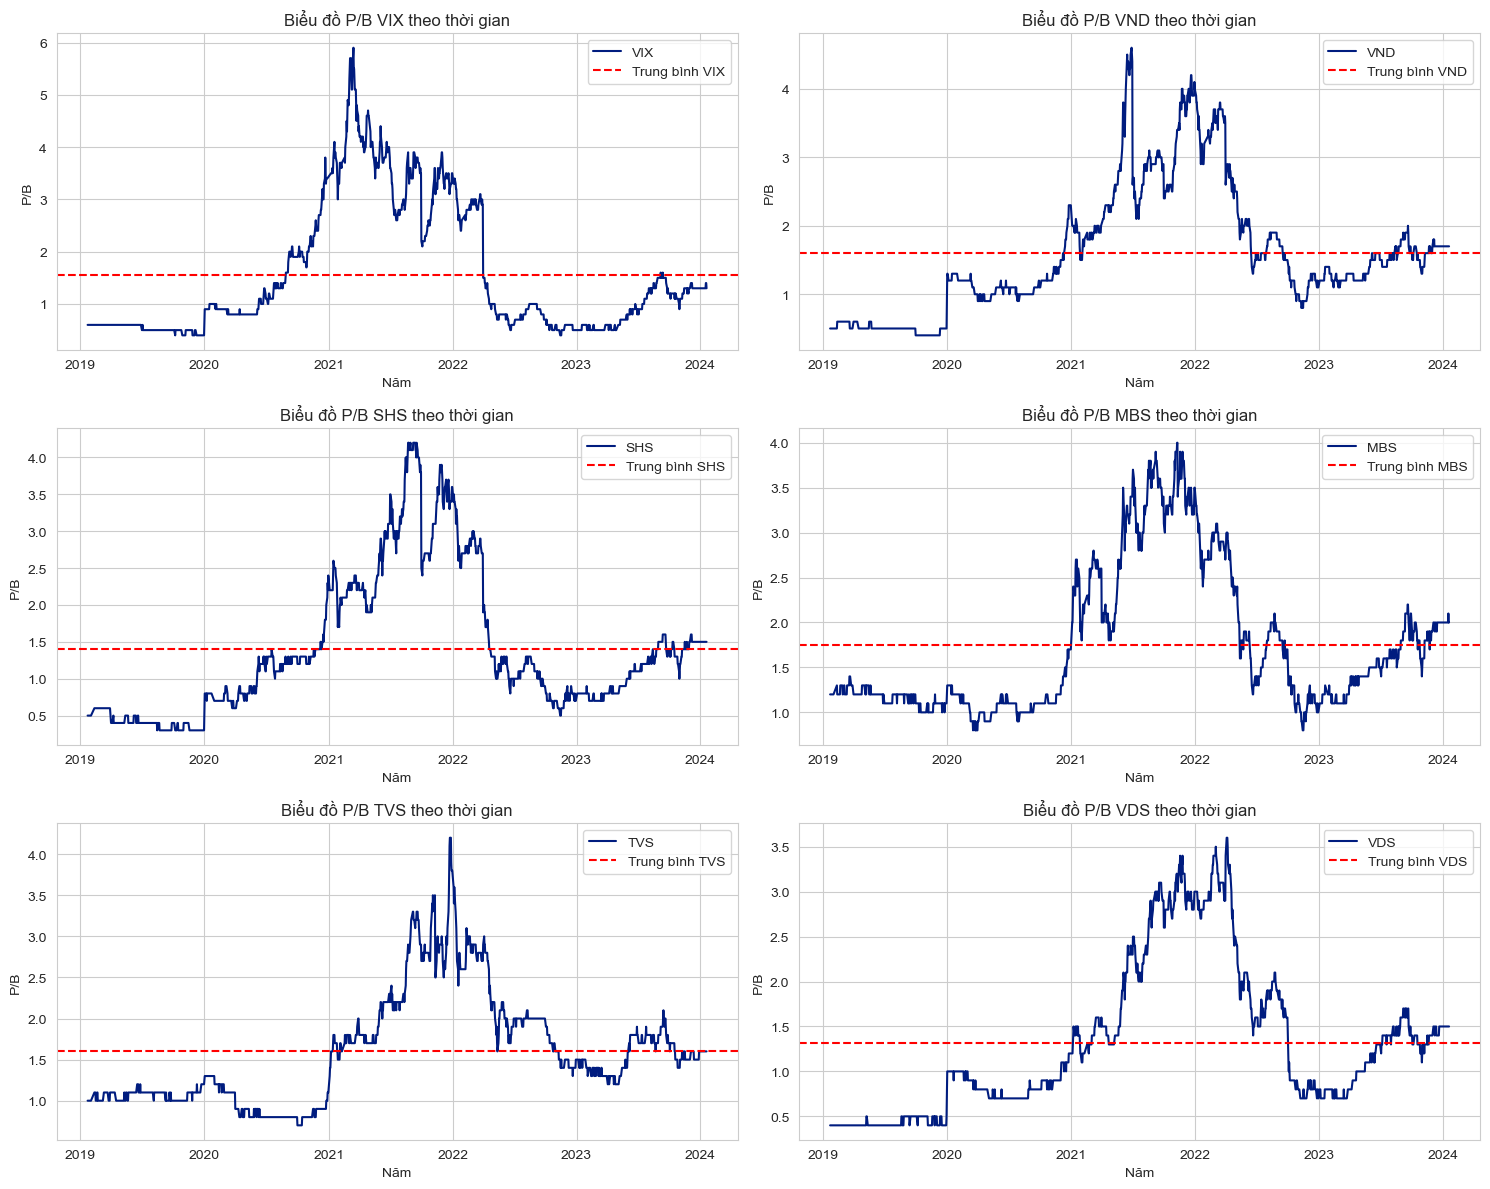

<Figure size 5120x3840 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt

# Tạo một lưới 2x2 cho biểu đồ
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

# Mã cổ phiếu và dữ liệu P/B tương ứng
pb_data = [data_vix, data_vnd, 
           data_shs,
           data_mbs, data_tvs,
           data_vds]
avg_pbs = [avg_pb_vix, avg_pb_vnd, 
           avg_pb_shs,  
           avg_pb_mbs, avg_pb_tvs, 
           avg_pb_vds]

# Vẽ biểu đồ cho từng mã cổ phiếu
for i in range(6):
    row, col = divmod(i, 2)  # Xác định vị trí hàng và cột trong lưới
    ax = axs[row, col]  # Lấy ô tại vị trí đó
    stock = last_stock_list[i]
    data = pb_data[i]
    avg_pb = avg_pbs[i]
    
    ax.plot(data['fromDate'], data['PB'], label=stock)  # Biểu đồ line P/B
    ax.axhline(y=avg_pb, color='r', linestyle='--', label=f"Trung bình {stock}")  # Đường trung bình
    ax.set_xlabel("Năm")
    ax.set_ylabel("P/B")
    ax.set_title(f"Biểu đồ P/B {stock} theo thời gian")
    ax.legend()

# Tạo khoảng trống cho tiêu đề chung của lưới
plt.tight_layout()

#output_file_path = 'pb_mean_pb_5_year_lineplot.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=800)
plt.show()


# 1.2 Phương pháp định giá chiết khấu dòng tiền:

## 1.2.1 Định giá theo dòng tiền tự do vốn chủ sở hữu

Tôi thu thập dữ liệu trong báo cáo tài chính mỗi năm trong thời gian năm 2017 đến 2022 của 20 công ty môi giới được lọc theo vốn hoá từ thấp đến cao và tôi đặt giả định chung cho cho tất cả cổ phiếu các công ty này để dự phóng các số liệu ( 3 năm tiếp theo 2023-2025) cho phương pháp định giá dòng tiền tự do vốn chủ sở hữu (FCFE).

In [26]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 500
import os
import openpyxl

# Đường dẫn chung, có thể thay đổi ổ đĩa D sang ổ đĩa khác cho phù hợp với máy bạn
path = r'D:\Downloads\Portfolio_Project\2. Stock Analysis\ANALYZING STOCK OF SECURITIES BROKERAGE FIRMS IN VIETNAM\BCTT'

# Lấy danh sách tất cả các file trong thư mục
files = os.listdir(path)
Mã_CP = []

# Lặp qua danh sách các file
for file in files:
    # Xác định mã cổ phiếu và loại báo cáo từ tên file
    code = file.split('_')[1]
    Mã_CP.append(code)
    report_type = file.split('_')[-2].split('.')[0]  # Loại bỏ phần mở rộng của file

    # Kiểm tra số lượng sheet trong file
    workbook = openpyxl.load_workbook(os.path.join(path, file), read_only=True)
    if len(workbook.sheetnames) > 1:
        # Nếu file có nhiều hơn một sheet, đọc sheet có tên là "LCTT"
        df = pd.read_excel(os.path.join(path, file), sheet_name='LCTT')
        header_row_index = df[df.apply(lambda row: row.astype(str).str.contains('LƯU CHUYỂN TIỀN TỆ GIÁN TIẾP').any(), 
                                       axis=1)].index[0]
        df = df.iloc[header_row_index:]
    else:
        # Nếu file chỉ có một sheet, đọc sheet đó
        df = pd.read_excel(os.path.join(path, file))
        df = df.iloc[4:]

    # Đặt hàng đầu tiên làm cột chính và xóa tên cột đầu tiên
    df.rename(index={df.index[0]: ""}, inplace=True)
    df.columns = df.iloc[0]
    df = df.iloc[7:-12]
    df.rename(columns={df.columns[0]: ""}, inplace=True)

    # Thay thế các giá trị NaN bằng 0
    df = df.fillna(0)
    df.reset_index(drop=True, inplace=True)
    df.set_index(df.columns[0], inplace=True)

    # Lưu DataFrame vào một biến toàn cục
    globals()[f'{code}_{report_type}'] = df


In [27]:
Mã_CP = list(set(Mã_CP))
print(Mã_CP)

['FTS', 'VND', 'HCM', 'VFS', 'BSI', 'APG', 'ORS', 'PHS', 'DSC', 'VCI', 'TVS', 'VIX', 'BVS', 'VDS', 'AAS', 'AGR', 'MBS', 'SSI', 'CTS', 'SHS']


In [28]:
print(len(Mã_CP))

20


## Buớc 1: Thu thập các dữ liệu và tính toán “FCFE”:


### - Tính “Thay đổi vốn lưu động” ( NOWC ):

Tăng/Giảm vốn lưu động = Tăng/Giảm tài sản ngắn hạn – Tăng/Giảm nợ ngắn hạn

Tăng/Giảm tài sản ngắn hạn = 〖Tài sản ngắn hạn〗_n -  〖Tài sản ngắn hạn〗_(n-1)

Tăng/Giảm nợ ngắn hạn = 〖Nợ ngắn hạn〗_n -  〖Nợ ngắn hạn〗_(n-1)


In [29]:
def NOWC_df(stock_CDKT):
    # Tạo DataFrame mới với cùng các cột như VIX_CDKT
    stock_NOWC = pd.DataFrame(columns=stock_CDKT.columns)


    # Chọn hàng có index chứa "A. TÀI SẢN NGẮN HẠN"
    short_term_assets = stock_CDKT[stock_CDKT.index.str.contains('A. TÀI SẢN NGẮN HẠN')]

    # Nếu có nhiều hơn một hàng khớp, hãy sử dụng hàng đầu tiên
    if len(short_term_assets) > 1:
        short_term_assets = short_term_assets.iloc[0]

    # Thêm vào DataFrame
    stock_NOWC.loc['Tài sản ngắn hạn'] = short_term_assets.squeeze()
    stock_NOWC.loc['Tăng/Giảm tài sản ngắn hạn'] = stock_NOWC.loc['Tài sản ngắn hạn'].to_frame().T.diff(axis=1).values[0]

    # Chọn hàng có index chứa "I. Nợ ngắn hạn"
    short_term_debts = stock_CDKT[stock_CDKT.index.str.contains('I. Nợ ngắn hạn')]

    # Nếu có nhiều hơn một hàng khớp, hãy sử dụng hàng đầu tiên
    if len(short_term_debts) > 1:
        short_term_debts = short_term_debts.iloc[0]

    # Thêm vào DataFrame
    stock_NOWC.loc['Nợ ngắn hạn'] = short_term_debts.squeeze()
    stock_NOWC.loc['Tăng/Giảm nợ ngắn hạn'] = stock_NOWC.loc['Nợ ngắn hạn'].to_frame().T.diff(axis=1).values[0]
    stock_NOWC.loc['Tăng/Giảm vốn lưu động'] =stock_NOWC.loc['Tăng/Giảm tài sản ngắn hạn'] - stock_NOWC.loc['Tăng/Giảm nợ ngắn hạn']
    return stock_NOWC


In [30]:
# Duyệt qua danh sách mã cổ phiếu
for stock_code in Mã_CP:
    # Lấy DataFrame tương ứng với mã cổ phiếu hiện tại
    stock_CDKT = globals()[f'{stock_code}_CDKT']
    
    # Áp dụng hàm NOWC_df và lưu kết quả vào một biến toàn cục với tên tương ứng
    globals()[f'{stock_code}_NOWC'] = NOWC_df(stock_CDKT)


In [31]:
SSI_NOWC

,2017,2018,2019,2020,2021,2022
Tài sản ngắn hạn,17228.00,22270.00,22291.00,29040.00,46540.00,48732.00
Tăng/Giảm tài sản ngắn hạn,NaN,5042.00,21.00,6749.00,17500.00,2192.00
Nợ ngắn hạn,9354.00,13469.00,16410.00,25823.00,36479.00,29789.00
Tăng/Giảm nợ ngắn hạn,NaN,4115.00,2941.00,9413.00,10656.00,-6690.00
Tăng/Giảm vốn lưu động,NaN,927.00,-2920.00,-2664.00,6844.00,8882.00


### - Tính “Chi đầu tư mới vào tài sản cố định” ( CAPEX):

Chi đầu tư mới vào tài sản cố định  = Tiền chi TSCĐ – Tiền thu từ TSCĐ

In [32]:
def CAPEX_df(stock_LCTT):
    stock_CAPEX = pd.DataFrame(columns=stock_LCTT.columns)
    stock_CAPEX.loc['Tiền chi TSCĐ'] = stock_LCTT.loc['1. Tiền chi để mua sắm, xây dựng TSCĐ và các tài sản dài hạn khác']
    stock_CAPEX.loc['Tiền thu từ TSCĐ'] = stock_LCTT.loc['2. Tiền thu từ thanh lý, nhượng bán TSCĐ và các tài sản dài hạn khác']
    stock_CAPEX.loc['Chi đầu tư mới vào TSCĐ'] = - (stock_CAPEX.loc['Tiền chi TSCĐ'] + stock_CAPEX.loc['Tiền thu từ TSCĐ'])
    return stock_CAPEX

In [33]:
# Duyệt qua danh sách mã cổ phiếu
for stock_code in Mã_CP:
    # Lấy DataFrame tương ứng với mã cổ phiếu hiện tại
    stock_LCTT = globals()[f'{stock_code}_LCTT']
    
    # Áp dụng hàm NOWC_df và lưu kết quả vào một biến toàn cục với tên tương ứng
    globals()[f'{stock_code}_CAPEX'] = CAPEX_df(stock_LCTT)


In [34]:
SSI_CAPEX

,2017,2018,2019,2020,2021,2022
Tiền chi TSCĐ,-35,-57,-67,-59,-165,-180
Tiền thu từ TSCĐ,1,207,0,2,1,0
Chi đầu tư mới vào TSCĐ,34,-150,67,57,164,180


### -	Tính “Thay đổi nợ ròng” ( Net-Debt ):

In [35]:
def NetDebt_df(stock_CDKT):
    stock_NetDebt = pd.DataFrame(columns=stock_CDKT.columns)

    # Chọn hàng có index chứa "A. TÀI SẢN NGẮN HẠN"
    cash = stock_CDKT[stock_CDKT.index.str.contains('1. Tiền và các khoản tương đương tiền')]

    # Nếu có nhiều hơn một hàng khớp, hãy sử dụng hàng đầu tiên
    if len(cash) > 1:
        cash = cash.iloc[0]

    # Thêm vào DataFrame
    stock_NetDebt.loc['Tiền và các khoản tương đương tiền'] = cash.squeeze()

    # Chọn hàng có index chứa "I. Nợ ngắn hạn"
    short_term_debts = stock_CDKT[stock_CDKT.index.str.contains('I. Nợ ngắn hạn')]

    # Nếu có nhiều hơn một hàng khớp, hãy sử dụng hàng đầu tiên
    if len(short_term_debts) > 1:
        short_term_debts = short_term_debts.iloc[0]

    
    stock_NetDebt.loc['Nợ ngắn hạn'] = short_term_debts.squeeze()
   

    # Chọn hàng có index chứa "I. Nợ ngắn hạn"
    long_term_debts = stock_CDKT[stock_CDKT.index.str.contains('II. Nợ dài hạn')]

    # Nếu có nhiều hơn một hàng khớp, hãy sử dụng hàng đầu tiên
    if len(long_term_debts) > 1:
        long_term_debts = long_term_debts.iloc[0]

    # Thêm vào DataFrame
    stock_NetDebt.loc['Nợ dài hạn'] = long_term_debts.squeeze()
    stock_NetDebt.loc['Nợ ròng'] = (stock_NetDebt.loc['Nợ ngắn hạn'] 
                                 + stock_NetDebt.loc['Nợ dài hạn']
                                ) - stock_NetDebt.loc['Tiền và các khoản tương đương tiền']

    stock_NetDebt.loc['Tăng/Giảm nợ ròng'] = stock_NetDebt.loc['Nợ ròng'].to_frame().T.diff(axis=1).values[0]
    return stock_NetDebt

In [36]:
# Duyệt qua danh sách mã cổ phiếu
for stock_code in Mã_CP:
    # Lấy DataFrame tương ứng với mã cổ phiếu hiện tại
    stock_CDKT = globals()[f'{stock_code}_CDKT']
    
    # Áp dụng hàm NOWC_df và lưu kết quả vào một biến toàn cục với tên tương ứng
    globals()[f'{stock_code}_NetDebt'] = NetDebt_df(stock_CDKT)


In [37]:
SSI_NetDebt

,2017,2018,2019,2020,2021,2022
Tiền và các khoản tương đương tiền,346.00,613.00,1041.00,363.00,1114.00,1418.00
Nợ ngắn hạn,9354.00,13469.00,16410.00,25823.00,36479.00,29789.00
Nợ dài hạn,794.00,1201.00,1234.00,73.00,94.00,54.00
Nợ ròng,9802.00,14057.00,16603.00,25533.00,35459.00,28425.00
Tăng/Giảm nợ ròng,NaN,4255.00,2546.00,8930.00,9926.00,-7034.00


### - Tính toán “Lợi nhuận kế toán sau thuế” ( NI – Net Income )

### - Kết hợp các số liệu đã tính để cho ra kết quả FCFE sau cùng:

FCFE = NI – CAPEX  + Khấu hao – NOWC + Net-Debt

In [38]:
def FCFE_df(stock_CDKT, stock_KQKD, 
            stock_LCTT, stock_NOWC, 
            stock_CAPEX, stock_NetDebt):
    # Tạo DataFrame mới với cùng các cột như VIX_KQKD
    stock_FCFE = pd.DataFrame(columns=stock_KQKD.columns)

    # Tính toán và thêm các biến vào VIX_FCFE
    stock_FCFE.loc['Doanh thu thuần'] = stock_KQKD.loc['Doanh thu thuần']
    stock_FCFE.loc['Tăng trưởng doanh thu thuần'] = stock_KQKD.loc['Doanh thu thuần'].to_frame().T.pct_change(axis=1).values[0]
    stock_FCFE.loc['Chi phí hoạt động kinh doanh'] = stock_KQKD.loc['Cộng chi phí hoạt động (21->33)']
    stock_FCFE.loc['% Chi phí hoạt động / Doanh thu thuần'] = stock_FCFE.loc['Chi phí hoạt động kinh doanh'] / stock_FCFE.loc['Doanh thu thuần']
    stock_FCFE.loc['Lợi nhuận gộp'] = stock_FCFE.loc['Doanh thu thuần'] - stock_FCFE.loc['Chi phí hoạt động kinh doanh']
    stock_FCFE.loc['Chi phí quản lý công ty chứng khoán'] = stock_KQKD.loc['VI. CHI PHÍ QUẢN LÝ CÔNG TY CHỨNG KHOÁN']
    stock_FCFE.loc['% Chi phí quản lý / Doanh thu thuần'] = stock_FCFE.loc['Chi phí quản lý công ty chứng khoán'] / stock_FCFE.loc['Doanh thu thuần']
    stock_FCFE.loc['Thu nhập khác ròng'] = stock_KQKD.loc['Cộng kết quả hoạt động khác']
    stock_FCFE.loc['% Thu nhập khác ròng / Doanh thu thuần'] = stock_FCFE.loc['Thu nhập khác ròng'] / stock_FCFE.loc['Doanh thu thuần']
    stock_FCFE.loc['Lãi/lỗ từ công ty liên doanh, liên kết'] = stock_KQKD.loc['Lãi/lỗ từ công ty liên doanh, liên kết']
    stock_FCFE.loc['% Lãi/lỗ từ công ty liên doanh / Doanh thu thuần'] = stock_FCFE.loc['Lãi/lỗ từ công ty liên doanh, liên kết'] / stock_FCFE.loc['Doanh thu thuần']

    stock_FCFE.loc['Tổng lợi nhuận kế toán trước thuế'] = (((stock_FCFE.loc['Lợi nhuận gộp'] 
                                                         - stock_FCFE.loc['Chi phí quản lý công ty chứng khoán']) 
                                                         + stock_FCFE.loc['Thu nhập khác ròng']) 
                                                         + stock_FCFE.loc['Lãi/lỗ từ công ty liên doanh, liên kết'])

    stock_FCFE.loc['Chi phí thuế thu nhập doanh nghiệp'] = stock_KQKD.loc['X. CHI PHÍ THUẾ THU NHẬP DOANH NGHIỆP']
    stock_FCFE.loc['% Chi phí thuế thu nhập doanh nghiệp / lợi nhuận trước thuế'] = stock_FCFE.loc['Chi phí thuế thu nhập doanh nghiệp'] / stock_FCFE.loc['Tổng lợi nhuận kế toán trước thuế']
    stock_FCFE.loc['Lợi nhuận kế toán sau thuế'] = (stock_FCFE.loc['Tổng lợi nhuận kế toán trước thuế'] 
                                                  - stock_FCFE.loc['Chi phí thuế thu nhập doanh nghiệp'])
        # Kiểm tra xem có 'Khấu hao tài sản cố định' trong stock_LCTT hay không
    if '- Khấu hao tài sản cố định' in stock_LCTT.index:
        stock_FCFE.loc['Khấu hao'] = stock_LCTT.loc['- Khấu hao tài sản cố định'].values
    else:
        # Nếu không có, gán giá trị 0 cho mọi năm từ 2017 đến 2022
        stock_FCFE.loc['Khấu hao'] = 0

    stock_FCFE.loc['% Khấu hao / Doanh thu thuần'] = stock_FCFE.loc['Khấu hao']/ stock_FCFE.loc['Doanh thu thuần']
    stock_FCFE.loc['Tăng/Giảm vốn lưu động'] = stock_NOWC.loc['Tăng/Giảm vốn lưu động']
    stock_FCFE.loc['% Tăng/Giảm vốn lưu động / Doanh thu thuần'] = stock_FCFE.loc['Tăng/Giảm vốn lưu động']/ stock_FCFE.loc['Doanh thu thuần']
    # Kiểm tra xem có 'Chi đầu tư mới vào TSCĐ' trong stock_CAPEX hay không
    if 'Chi đầu tư mới vào TSCĐ' in stock_CAPEX.index:
        stock_FCFE.loc['Chi đầu tư mới vào TSCĐ'] = stock_CAPEX.loc['Chi đầu tư mới vào TSCĐ'].values
    else:
        # Nếu không có, gán giá trị 0 cho mọi năm từ 2017 đến 2022
        stock_FCFE.loc['Chi đầu tư mới vào TSCĐ'] = 0
    
    stock_FCFE.loc['% Chi đầu tư mới vào TSCĐ / Doanh thu thuần'] = stock_FCFE.loc['Chi đầu tư mới vào TSCĐ']/ stock_FCFE.loc['Doanh thu thuần']
    stock_FCFE.loc['Tăng/Giảm nợ ròng'] = stock_NetDebt.loc['Tăng/Giảm nợ ròng']
    stock_FCFE.loc['% Tăng/Giảm nợ ròng / Doanh thu thuần'] = stock_FCFE.loc['Tăng/Giảm nợ ròng']/ stock_FCFE.loc['Doanh thu thuần']
    stock_FCFE.loc['FCFE'] = ((((stock_FCFE.loc['Lợi nhuận kế toán sau thuế'] 
                            + stock_FCFE.loc['Khấu hao']) 
                            - stock_FCFE.loc['Chi đầu tư mới vào TSCĐ']) 
                            - stock_FCFE.loc['Tăng/Giảm vốn lưu động']) 
                            + stock_FCFE.loc['Tăng/Giảm nợ ròng'])



    return stock_FCFE


In [39]:
# Duyệt qua danh sách mã cổ phiếu
for stock_code in Mã_CP:
    # Lấy DataFrame tương ứng với mã cổ phiếu hiện tại
    stock_CDKT = globals()[f'{stock_code}_CDKT']
    stock_KQKD = globals()[f'{stock_code}_KQKD']
    stock_LCTT = globals()[f'{stock_code}_LCTT']
    stock_NOWC = globals()[f'{stock_code}_NOWC']
    stock_CAPEX = globals()[f'{stock_code}_CAPEX']
    stock_NetDebt = globals()[f'{stock_code}_NetDebt']
    
    # Áp dụng hàm NOWC_df và lưu kết quả vào một biến toàn cục với tên tương ứng
    globals()[f'{stock_code}_FCFE'] = FCFE_df(stock_CDKT, stock_KQKD,
                                              stock_LCTT, stock_NOWC, 
                                              stock_CAPEX, stock_NetDebt)


In [40]:
SSI_FCFE

,2017,2018,2019,2020,2021,2022
Doanh thu thuần,2898.00,3673.00,3235.00,4367.00,7443.00,6336.00
Tăng trưởng doanh thu thuần,NaN,0.27,-0.12,0.35,0.70,-0.15
Chi phí hoạt động kinh doanh,1137.00,1651.00,1171.00,1902.00,3155.00,2705.00
% Chi phí hoạt động / Doanh thu thuần,0.39,0.45,0.36,0.44,0.42,0.43
Lợi nhuận gộp,1761.00,2022.00,2064.00,2465.00,4288.00,3631.00
Chi phí quản lý công ty chứng khoán,168.00,174.00,193.00,184.00,265.00,296.00
% Chi phí quản lý / Doanh thu thuần,0.06,0.05,0.06,0.04,0.04,0.05
Thu nhập khác ròng,13.00,56.00,7.00,5.00,113.00,10.00
% Thu nhập khác ròng / Doanh thu thuần,0.00,0.02,0.00,0.00,0.02,0.00
"Lãi/lỗ từ công ty liên doanh, liên kết",0.00,0.00,0.00,0.00,0.00,0.00


## Bước 2: Xác định và dự phóng cho FCFE cho tương lai: 

Dự phóng FCFE dựa theo giả định dưới đây:
- Tăng trưởng doanh thu các năm dự phóng sẽ bằng trung bình 5 năm gần nhất. Ví dụ năm 2023 bằng giá trị trung bình từ năm 2018 đến 2022, năm 2024 sẽ bằng giá trị trung bình từ năm 2019 đến 2023,….
- Các tỷ lệ phần trăm trên doanh thu thuần của các năm dự phóng bằng giá trị trung bình từ năm 2018 đến 2022
- Tỷ lệ “% Chi phí thuế thu nhập doanh nghiệp / lợi nhuận trước thuế” các năm dự phóng có giá trị bằng với giá trị ở năm cuối cùng ( 2022 )
- Từ các giả định trên ta dễ dàng tính các số liệu liên quan và cho ra kết quả FCFE dự phóng trong vòng 3 năm 2023, 2024, 2025.


In [41]:
def FCFE_FORECAST_df(stock_FCFE):
    stock_FCFE_FORECAST = stock_FCFE.assign(**{'2023': None, '2024': None, '2025': None})

    def mean_forecast(Metrics): 
        mean_metrics_rev = stock_FCFE_FORECAST.loc[Metrics].dropna().tail(5).mean()
        stock_FCFE_FORECAST.loc[Metrics, ['2023', '2024', '2025']] =  mean_metrics_rev

    mean_forecast("% Chi phí hoạt động / Doanh thu thuần")
    mean_forecast("% Chi phí quản lý / Doanh thu thuần")
    mean_forecast("% Thu nhập khác ròng / Doanh thu thuần")
    mean_forecast("% Lãi/lỗ từ công ty liên doanh / Doanh thu thuần")
    mean_forecast("% Khấu hao / Doanh thu thuần")

    mean_forecast("% Chi đầu tư mới vào TSCĐ / Doanh thu thuần")
    mean_forecast("% Tăng/Giảm nợ ròng / Doanh thu thuần")
    last_tax_income_ratio = stock_FCFE_FORECAST.loc["% Chi phí thuế thu nhập doanh nghiệp / lợi nhuận trước thuế", "2022"]
    stock_FCFE_FORECAST.loc["% Chi phí thuế thu nhập doanh nghiệp / lợi nhuận trước thuế"
                          , ['2023', '2024', '2025']] =  last_tax_income_ratio

    years = ['2023', '2024', '2025']
    for i, year in enumerate(years):
        start_year = 2018 + i
        end_year = 2022 + i
        mean_revenue_growth = stock_FCFE_FORECAST.loc["Tăng trưởng doanh thu thuần", f"{start_year}":f"{end_year}"].mean()
        stock_FCFE_FORECAST.loc["Tăng trưởng doanh thu thuần", year] = mean_revenue_growth
        mean_WC_growth = stock_FCFE_FORECAST.loc["% Tăng/Giảm vốn lưu động / Doanh thu thuần"].mean()
        stock_FCFE_FORECAST.loc["% Tăng/Giảm vốn lưu động / Doanh thu thuần", year] = mean_WC_growth

    for year in range(2023, 2026):
        # Tính doanh thu thuần cho năm hiện tại
        stock_FCFE_FORECAST.loc['Doanh thu thuần', str(year)] = (stock_FCFE_FORECAST.loc['Doanh thu thuần', str(year - 1)] 
                                                               * (1 + stock_FCFE_FORECAST.loc['Tăng trưởng doanh thu thuần', str(year)]))
        stock_FCFE_FORECAST.loc['Chi phí hoạt động kinh doanh', str(year)] = stock_FCFE_FORECAST.loc['Doanh thu thuần', str(year)] * stock_FCFE_FORECAST.loc['% Chi phí hoạt động / Doanh thu thuần', str(year)]
        stock_FCFE_FORECAST.loc['Chi phí quản lý công ty chứng khoán', str(year)] = stock_FCFE_FORECAST.loc['Doanh thu thuần', str(year)] * stock_FCFE_FORECAST.loc['% Chi phí quản lý / Doanh thu thuần', str(year)]
        stock_FCFE_FORECAST.loc['Thu nhập khác ròng', str(year)] = stock_FCFE_FORECAST.loc['Doanh thu thuần', str(year)] * stock_FCFE_FORECAST.loc['% Thu nhập khác ròng / Doanh thu thuần', str(year)]
        stock_FCFE_FORECAST.loc['Lãi/lỗ từ công ty liên doanh, liên kết', str(year)] = stock_FCFE_FORECAST.loc['Doanh thu thuần', str(year)] * stock_FCFE_FORECAST.loc['% Lãi/lỗ từ công ty liên doanh / Doanh thu thuần', str(year)]
        stock_FCFE_FORECAST.loc['Khấu hao', str(year)] = stock_FCFE_FORECAST.loc['Doanh thu thuần', str(year)] * stock_FCFE_FORECAST.loc['% Khấu hao / Doanh thu thuần', str(year)]
        stock_FCFE_FORECAST.loc['Tăng/Giảm vốn lưu động', str(year)] = stock_FCFE_FORECAST.loc['Doanh thu thuần', str(year)] * stock_FCFE_FORECAST.loc['% Tăng/Giảm vốn lưu động / Doanh thu thuần', str(year)]
        stock_FCFE_FORECAST.loc['Chi đầu tư mới vào TSCĐ', str(year)] = stock_FCFE_FORECAST.loc['Doanh thu thuần', str(year)] * stock_FCFE_FORECAST.loc['% Chi đầu tư mới vào TSCĐ / Doanh thu thuần', str(year)]
        stock_FCFE_FORECAST.loc['Tăng/Giảm nợ ròng', str(year)] = stock_FCFE_FORECAST.loc['Doanh thu thuần', str(year)] * stock_FCFE_FORECAST.loc['% Tăng/Giảm nợ ròng / Doanh thu thuần', str(year)]

    stock_FCFE_FORECAST.loc['Lợi nhuận gộp'] = stock_FCFE_FORECAST.loc['Doanh thu thuần'] - stock_FCFE_FORECAST.loc['Chi phí hoạt động kinh doanh']
    stock_FCFE_FORECAST.loc['Tổng lợi nhuận kế toán trước thuế'] = (((stock_FCFE_FORECAST.loc['Lợi nhuận gộp'] 
                                                         - stock_FCFE_FORECAST.loc['Chi phí quản lý công ty chứng khoán']) 
                                                         + stock_FCFE_FORECAST.loc['Thu nhập khác ròng']) 
                                                         + stock_FCFE_FORECAST.loc['Lãi/lỗ từ công ty liên doanh, liên kết'])

    stock_FCFE_FORECAST.loc['Chi phí thuế thu nhập doanh nghiệp'] = stock_FCFE_FORECAST.loc['Tổng lợi nhuận kế toán trước thuế'] * stock_FCFE_FORECAST.loc['% Chi phí thuế thu nhập doanh nghiệp / lợi nhuận trước thuế']
    stock_FCFE_FORECAST.loc['Lợi nhuận kế toán sau thuế'] = (stock_FCFE_FORECAST.loc['Tổng lợi nhuận kế toán trước thuế'] 
                                                  - stock_FCFE_FORECAST.loc['Chi phí thuế thu nhập doanh nghiệp'])

    stock_FCFE_FORECAST.loc['FCFE'] = ((((stock_FCFE_FORECAST.loc['Lợi nhuận kế toán sau thuế'] 
                            + stock_FCFE_FORECAST.loc['Khấu hao']) 
                            - stock_FCFE_FORECAST.loc['Chi đầu tư mới vào TSCĐ']) 
                            - stock_FCFE_FORECAST.loc['Tăng/Giảm vốn lưu động']) 
                            + stock_FCFE_FORECAST.loc['Tăng/Giảm nợ ròng'])
    return stock_FCFE_FORECAST


In [42]:
# Duyệt qua danh sách mã cổ phiếu
for stock_code in Mã_CP:
    # Lấy DataFrame tương ứng với mã cổ phiếu hiện tại
    stock_FCFE = globals()[f'{stock_code}_FCFE']
    
    # Áp dụng hàm NOWC_df và lưu kết quả vào một biến toàn cục với tên tương ứng
    globals()[f'{stock_code}_FCFE_FORECAST'] = FCFE_FORECAST_df(stock_FCFE)


In [43]:
SSI_FCFE_FORECAST

,2017,2018,2019,2020,2021,2022,2023,2024,2025
Doanh thu thuần,2898.00,3673.00,3235.00,4367.00,7443.00,6336.00,7671.30,9201.06,11622.28
Tăng trưởng doanh thu thuần,NaN,0.27,-0.12,0.35,0.70,-0.15,0.21,0.20,0.26
Chi phí hoạt động kinh doanh,1137.00,1651.00,1171.00,1902.00,3155.00,2705.00,3218.61,3860.45,4876.31
% Chi phí hoạt động / Doanh thu thuần,0.39,0.45,0.36,0.44,0.42,0.43,0.42,0.42,0.42
Lợi nhuận gộp,1761.00,2022.00,2064.00,2465.00,4288.00,3631.00,4452.69,5340.61,6745.97
Chi phí quản lý công ty chứng khoán,168.00,174.00,193.00,184.00,265.00,296.00,355.16,425.99,538.08
% Chi phí quản lý / Doanh thu thuần,0.06,0.05,0.06,0.04,0.04,0.05,0.05,0.05,0.05
Thu nhập khác ròng,13.00,56.00,7.00,5.00,113.00,10.00,54.18,64.99,82.09
% Thu nhập khác ròng / Doanh thu thuần,0.00,0.02,0.00,0.00,0.02,0.00,0.01,0.01,0.01
"Lãi/lỗ từ công ty liên doanh, liên kết",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Bước 3: Tính giá trị hiện tại của dòng tiền để tìm ra được giá trị vốn chủ sở hữu

### - Tính giá trị “chi phí bình quân sử dụng vốn” ( R_e ) dựa theo công thức CAMP:

R_e = R_f + Beta(ER_m - R_f)

ER_m - R_f = Adj Default + Equity Risk Premium

Lấy giá trị Adj_Default_Spread và Equity_Risk_Premium qua đường link sau:

https://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/ctryprem.html

R_f thì ta lấy giá trị "Lợi suất Trái phiếu Việt Nam 10 Năm" qua trang web investing:
    "https://www.investing.com/rates-bonds/vietnam-10-year-bond-yield"

In [44]:
import vnstock as vn
def CAPM(stock_code, start_date, end_date):
    import vnstock as vn
    Rf = 2.283/100
    Adj_Default_Spread = 3.22/100
    Equity_Risk_Premium = 9.57/100
    ERm = Adj_Default_Spread + Equity_Risk_Premium + Rf

    stock_2022 = vn.stock_historical_data(symbol=stock_code, start_date=start_date, end_date=end_date, resolution="1D", type="stock")
    VNINDEX_2022 = vn.stock_historical_data("VNINDEX", start_date, end_date, "1D", "index")

    stock_price_2022 = stock_2022[['time','close']]
    VNINDEX_price_2022 = VNINDEX_2022[['time','close']]

    # Đổi tên cột 'close'
    stock_price_2022 = stock_price_2022.rename(columns={'close': stock_code})
    VNINDEX_price_2022 = VNINDEX_price_2022.rename(columns={'close': 'VNINDEX'})

    # Gộp hai DataFrame
    merged_df = pd.merge(stock_price_2022, VNINDEX_price_2022, on='time')
    merged_df = merged_df.set_index('time')

    merged_df_return = merged_df.pct_change()
    merged_df_cov = merged_df_return.cov()*len(merged_df_return)

    stock_cov_VNINDEX = merged_df_cov.iloc[0,-1]
    VNINDEX_var =  merged_df_return['VNINDEX'].var() * len(merged_df)

    stock_beta = stock_cov_VNINDEX/VNINDEX_var
    stock_Re = Rf + stock_beta*(ERm - Rf)
    
    return stock_Re, stock_beta


In [45]:
for stock_code in Mã_CP:
    # Lấy DataFrame tương ứng với mã cổ phiếu hiện tại
    stock_Re, stock_beta = CAPM(stock_code, start_date="2022-01-01", end_date="2022-12-30")
    # Lưu kết quả vào các biến toàn cục
    globals()[f'{stock_code}_Re'] = stock_Re
    globals()[f'{stock_code}_beta'] = stock_beta


In [46]:
for stock_code in Mã_CP:
    # Lấy DataFrame tương ứng với mã cổ phiếu hiện tại
    stock_Re, stock_beta = CAPM(stock_code, start_date="2023-01-01", end_date="2023-12-30")
    # Lưu kết quả vào các biến toàn cục
    globals()[f'{stock_code}_Re_2023'] = stock_Re
    globals()[f'{stock_code}_beta_2023'] = stock_beta


In [47]:
print(SSI_beta)
print(SSI_Re)
print(SSI_beta_2023)
print(SSI_Re_2023)

1.6993839595875455
0.24018120843124707
1.891452773598229
0.2647468097432135


### - Tính giá trị vốn chủ sở hữu:
#### + Tính giá trị hiện tại của dòng tiền để tìm ra được giá trị vốn chủ sở hữu:

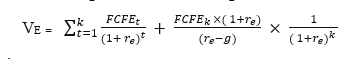


#### + Giá trị vốn chủ sở hữu = Tổng giá trị hiện tại qua các năm dự phóng

Giả định: Tốc độ tăng trưởng dài hạn bằng trung bình tăng trưởng GDP 5 năm gần nhất (2018-2022)

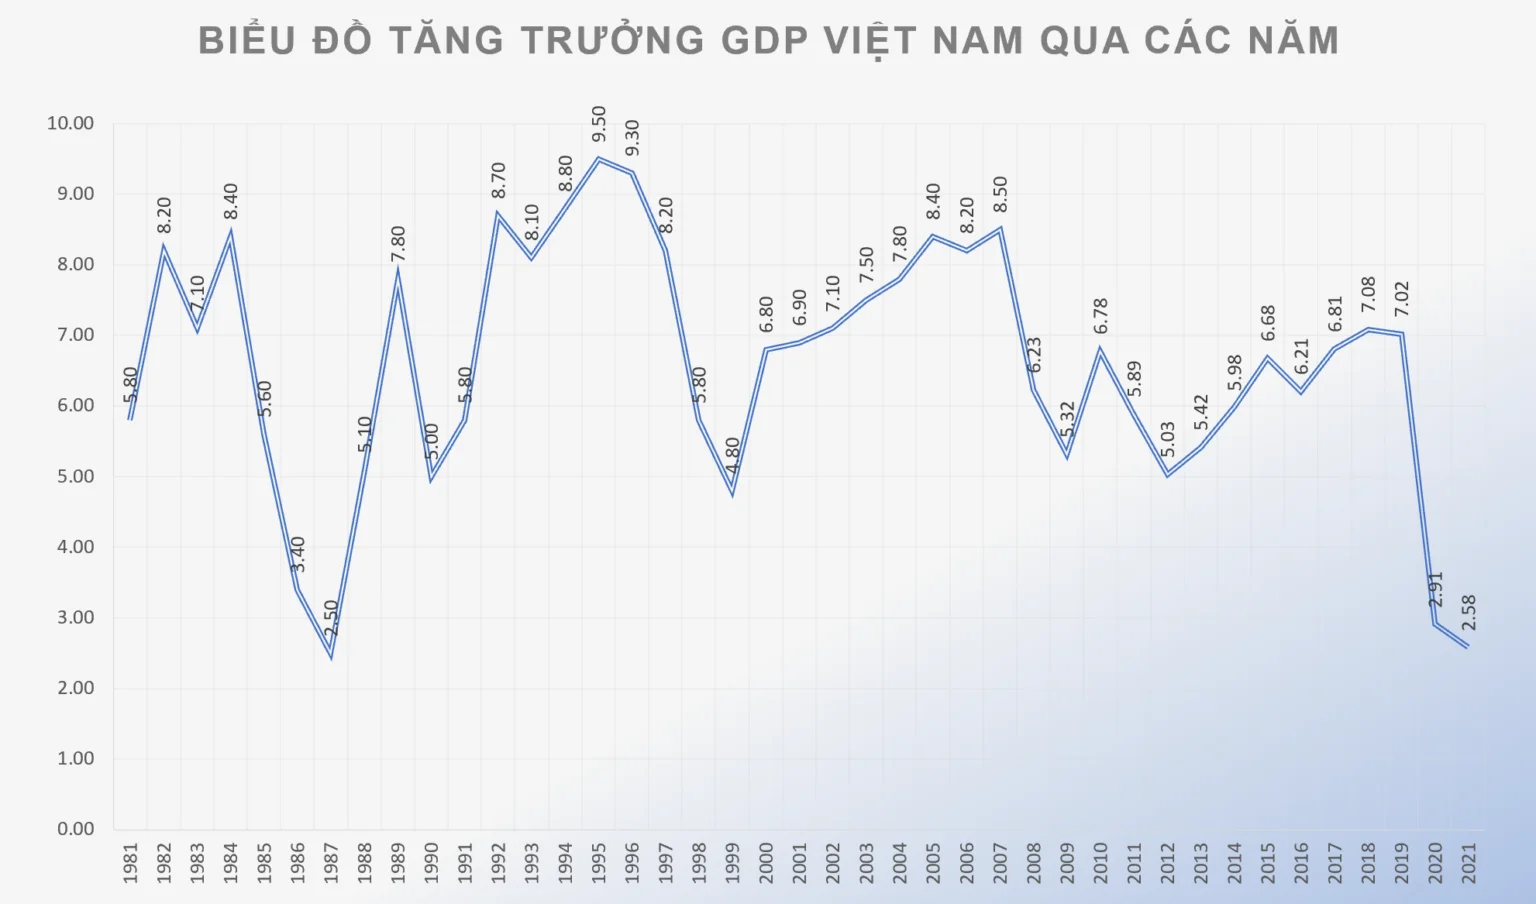


https://trinhj.com/tang-truong-kinh-te-gdp-cua-viet-nam-qua-cac-nam/#T%C4%83ng%20Tr%C6%B0%E1%BB%9Fng%20Kinh%20T%E1%BA%BF%20Vi%E1%BB%87t%20Nam%20N%C4%83m%202020:%202,91%

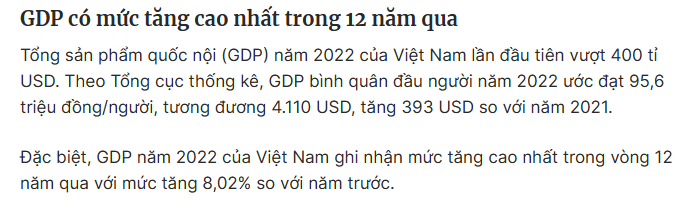

https://thanhnien.vn/2022-nhin-lai-gdp-cao-ky-luc-va-diem-sang-kinh-te-viet-nam-1851537768.htm

In [48]:
g = ((8.02 + 2.58 + 2.91 + 7.02 + 7.08)/5)/100
g

0.055220000000000005

In [49]:
def stock_equity(stock_FCFE_FORECAST, stock_Re, n):
    stock_FCFE_FORECAST_DCF = stock_FCFE_FORECAST.tail(1)

    # Lấy FCFE năm cuối cùng
    stock_last_year_FCFE = stock_FCFE_FORECAST_DCF.iloc[0, -1]

    # Tính Terminal_value
    stock_Terminal_value = stock_last_year_FCFE * (1 + g) / (stock_Re - g)

    # Khởi tạo giá trị NPV
    stock_equity_value = 0

    # Lặp qua từng năm từ 2023 đến 2025
    for i in range(n):
        # Nếu đây là năm cuối cùng (2025), thêm Terminal_value vào FCFE
        if i == (n - 1):
            FCFE = stock_FCFE_FORECAST_DCF.iloc[0, -n+i] + stock_Terminal_value
        else:
            FCFE = stock_FCFE_FORECAST_DCF.iloc[0, -n+i]

        # Tính NPV cho năm hiện tại và cộng dồn vào equity_value
        stock_equity_value += FCFE / (1 + stock_Re)**(i+1)
        
    return stock_equity_value

In [50]:
# Duyệt qua danh sách mã cổ phiếu
for stock_code in Mã_CP:
    # Lấy DataFrame tương ứng với mã cổ phiếu hiện tại
    stock_FCFE_FORECAST = globals()[f'{stock_code}_FCFE_FORECAST']
    stock_Re = globals()[f'{stock_code}_Re']
    
    # Áp dụng hàm NOWC_df và lưu kết quả vào một biến toàn cục với tên tương ứng
    globals()[f'{stock_code}_equity_value'] = stock_equity(stock_FCFE_FORECAST, stock_Re, 3)


In [51]:
# Duyệt qua danh sách mã cổ phiếu
for stock_code in Mã_CP:
    # Lấy DataFrame tương ứng với mã cổ phiếu hiện tại
    stock_FCFE_FORECAST = globals()[f'{stock_code}_FCFE_FORECAST']
    stock_Re = globals()[f'{stock_code}_Re_2023']
    
    # Áp dụng hàm NOWC_df và lưu kết quả vào một biến toàn cục với tên tương ứng
    globals()[f'{stock_code}_equity_value_2023'] = stock_equity(stock_FCFE_FORECAST, stock_Re, 2)


In [52]:
SSI_equity_value

58733.675310434046

In [53]:
SSI_equity_value_2023

56640.63537474912

## Bước 4: Xác định vốn hóa thị trường từ đó tính giá trị cho mỗi cổ phần.

Vốn cổ phần - Vốn góp chủ sở hữu - Cổ phiếu quỹ"

Số lượng cổ phiếu lưu hành (Shares outstanding) = (Vốn cổ phần)/(Mệnh giá)

Giá trị trên mỗi cổ phần: P/S   =   (Equity Value)/(Share outstanding)


### - Tính giá trị “Vốn cổ phần”:

In [54]:
def VCP_2022(stock_CDKt):    
    stock_VCP = pd.DataFrame(columns= stock_CDKT.columns)
    
    stock_VonGop = VIX_CDKT[VIX_CDKT.index.str.contains('1.1. Vốn góp của chủ sở hữu')]
    stock_cophieuquy = VIX_CDKT[VIX_CDKT.index.str.contains('1.5. Cổ phiếu quỹ')]


    # Ensure VIX_VonGop and VIX_cophieuquy have the same columns as VIX_CDKT
    stock_VonGop = stock_VonGop.reindex(columns=stock_CDKT.columns)
    stock_cophieuquy = stock_cophieuquy.reindex(columns=stock_CDKT.columns)

    stock_VCP.loc['Vốn góp CSH'] = stock_VonGop.squeeze()
    stock_VCP.loc['Cổ phiếu quỹ'] =stock_cophieuquy.squeeze()

    # Perform the subtraction
    stock_VCP.loc['Vốn cổ phần'] = (stock_VCP.loc['Vốn góp CSH'] - stock_VCP.loc['Cổ phiếu quỹ'])
    #VIX_VCP.loc['Tăng trưởng vốn cổ phần'] = VIX_VCP.loc['Vốn cổ phần'].to_frame().T.pct_change(axis=1)

    # Calculate the percentage change
    percentage_change = stock_VCP.loc['Vốn cổ phần'].to_frame().T.pct_change(axis=1)

    # Add a NaN value to the beginning
    percentage_change.insert(0, 'NaN', np.nan)

    # Assign the row to VIX_VCP
    stock_VCP.loc['Tăng trưởng vốn cổ phần'] = percentage_change.squeeze()

    average_growth = stock_VCP.loc['Tăng trưởng vốn cổ phần'].mean()

    stock_VCP_2022 = stock_VCP.loc['Vốn cổ phần', '2022']
    
    return stock_VCP_2022


In [55]:
for stock_code in Mã_CP:
    stock_CDKT = globals()[f'{stock_code}_CDKT']
    
    globals()[f'{stock_code}_VCP_2022'] = VCP_2022(stock_CDKT)


In [56]:
def VCP_2023(stock_CDKT):
    stock_VCP = pd.DataFrame(columns= stock_CDKT.columns)
    
    stock_VonGop = VIX_CDKT[VIX_CDKT.index.str.contains('1.1. Vốn góp của chủ sở hữu')]
    stock_cophieuquy = VIX_CDKT[VIX_CDKT.index.str.contains('1.5. Cổ phiếu quỹ')]


    # Ensure VIX_VonGop and VIX_cophieuquy have the same columns as VIX_CDKT
    stock_VonGop = stock_VonGop.reindex(columns=stock_CDKT.columns)
    stock_cophieuquy = stock_cophieuquy.reindex(columns=stock_CDKT.columns)

    stock_VCP.loc['Vốn góp CSH'] = stock_VonGop.squeeze()
    stock_VCP.loc['Cổ phiếu quỹ'] =stock_cophieuquy.squeeze()

    # Perform the subtraction
    stock_VCP.loc['Vốn cổ phần'] = (stock_VCP.loc['Vốn góp CSH'] - stock_VCP.loc['Cổ phiếu quỹ'])
    #VIX_VCP.loc['Tăng trưởng vốn cổ phần'] = VIX_VCP.loc['Vốn cổ phần'].to_frame().T.pct_change(axis=1)

    # Calculate the percentage change
    percentage_change = stock_VCP.loc['Vốn cổ phần'].to_frame().T.pct_change(axis=1)

    # Add a NaN value to the beginning
    percentage_change.insert(0, 'NaN', np.nan)

    # Assign the row to VIX_VCP
    stock_VCP.loc['Tăng trưởng vốn cổ phần'] = percentage_change.squeeze()

    average_growth = stock_VCP.loc['Tăng trưởng vốn cổ phần'].mean()

    stock_VCP_2022 = stock_VCP.loc['Vốn cổ phần', '2022']
    
    stock_VCP_2023 = stock_VCP_2022 * ( 1 + average_growth )
    
    return stock_VCP_2023

In [57]:
for stock_code in Mã_CP:
    stock_CDKT = globals()[f'{stock_code}_CDKT']
    
    globals()[f'{stock_code}_VCP_2023'] = VCP_2023(stock_CDKT)


In [58]:
print(SSI_VCP_2022)
print(SSI_VCP_2023)

5821.0
9201.782898714924


### - Tính giá trị “Mệnh giá”:

In [59]:
def Price(stock_code, start_date, end_date):
    import vnstock as vn
    stock_Price = vn.stock_historical_data(symbol= stock_code, resolution="1D", start_date= start_date, end_date= end_date)
    if not stock_Price.empty:
        stock_Price = stock_Price.iloc[-1,4]
        return stock_Price
    else:
        return None

In [60]:
stock_prices = {}
for year in range(2018, 2024):
    start_date = f"{year}-01-01"
    end_date = f"{year+1}-01-01"
    for stock_code in Mã_CP:
        stock_prices[f'{stock_code}_{year}'] = Price(stock_code, start_date, end_date)
        globals()[f'{stock_code}_{year}'] = stock_prices[f'{stock_code}_{year}'] 
        
        

In [61]:
print(SSI_2022)
print(SSI_2023)

17030
32800


### - Tính giá trị trên mỗi cổ phần (P/S)

In [62]:
def Price_per_share(stock_VCP, stock_Price,
                    stock_equity_value):

    stock_Share_outstanding = (stock_VCP * (10**9)) / stock_Price
    stock_Price_per_share = (stock_equity_value * (10**9)) / stock_Share_outstanding
    
    return stock_Price_per_share

In [63]:
for stock_code in Mã_CP:
    # Lấy DataFrame tương ứng với mã cổ phiếu hiện tại
    stock_VCP = globals()[f'{stock_code}_VCP_2022']
    stock_Price_2022 = globals()[f'{stock_code}_2022']
    stock_equity_value = globals()[f'{stock_code}_equity_value']    
    
    # Áp dụng hàm NOWC_df và lưu kết quả vào một biến toàn cục với tên tương ứng
    globals()[f'{stock_code}_Price_per_share_2022'] = Price_per_share(stock_VCP, stock_Price_2022,
                                                                      stock_equity_value)

In [64]:
for stock_code in Mã_CP:
    # Lấy DataFrame tương ứng với mã cổ phiếu hiện tại
    stock_VCP_2023 = globals()[f'{stock_code}_VCP_2023']
    stock_Price_2023 = globals()[f'{stock_code}_2023']
    stock_equity_value_2023 = globals()[f'{stock_code}_equity_value_2023']    
    
    # Áp dụng hàm NOWC_df và lưu kết quả vào một biến toàn cục với tên tương ứng
    globals()[f'{stock_code}_Price_per_share_2023'] = Price_per_share(stock_VCP_2023, stock_Price_2023,
                                                                      stock_equity_value_2023)

In [65]:
print(SSI_equity_value)
print(SSI_Price_per_share_2022)
print(SSI_Price_per_share_2023)
print(SSI_2022)
print(SSI_2023)



58733.675310434046
171832.07190116678
201897.05198882974
17030
32800


In [67]:
data = {
    "Mã_CP": [],
    "Historical FCFE 2018": [],
    "Historical FCFE 2019": [],
    "Historical FCFE 2020": [],
    "Historical FCFE 2021": [],
    "Historical FCFE 2022": [],
    "Forecast FCFE 2023": [],
    "Forecast FCFE 2024": [],
    "Forecast FCFE 2025": [],
    "Equity value 2022": [],
    "Price per share 2022": [],
    "Equity value 2023": [],
    "Price per share 2023": [],
    "Price 2022": [],
    "Price 2023": []
}

for mã in Mã_CP:
    data["Mã_CP"].append(mã)
    data["Historical FCFE 2018"].append(eval(f"{mã}_FCFE_FORECAST.loc['FCFE']['2018']"))
    data["Historical FCFE 2019"].append(eval(f"{mã}_FCFE_FORECAST.loc['FCFE']['2019']"))
    data["Historical FCFE 2020"].append(eval(f"{mã}_FCFE_FORECAST.loc['FCFE']['2020']"))
    data["Historical FCFE 2021"].append(eval(f"{mã}_FCFE_FORECAST.loc['FCFE']['2021']"))
    data["Historical FCFE 2022"].append(eval(f"{mã}_FCFE_FORECAST.loc['FCFE']['2022']"))
    data["Forecast FCFE 2023"].append(eval(f"{mã}_FCFE_FORECAST.loc['FCFE']['2023']"))
    data["Forecast FCFE 2024"].append(eval(f"{mã}_FCFE_FORECAST.loc['FCFE']['2024']"))
    data["Forecast FCFE 2025"].append(eval(f"{mã}_FCFE_FORECAST.loc['FCFE']['2025']"))
    data["Equity value 2022"].append(eval(f"{mã}_equity_value"))
    data["Price per share 2022"].append(eval(f"{mã}_Price_per_share_2022"))
    data["Equity value 2023"].append(eval(f"{mã}_equity_value_2023"))
    data["Price per share 2023"].append(eval(f"{mã}_Price_per_share_2023"))
    data["Price 2022"].append(eval(f"{mã}_2022"))
    data["Price 2023"].append(eval(f"{mã}_2023"))

df = pd.DataFrame(data)
# Danh sách mã cổ phiếu theo thứ tự mong muốn
dfr_top_20 = dfr_sorted.head(20)
order = dfr_top_20['Mã CP']
#order = ["SSI", "VND", "VCI", "SHS", "HCM", "VIX", "MBS", "BSI", "FTS", "CTS", "AGR", "VDS", "DSC", "ORS", "TVS", "PHS", "VFS", "AAS", "BVS", "APG"]

# Sắp xếp DataFrame dựa trên danh sách mã cổ phiếu
df = df.set_index('Mã_CP').loc[order].reset_index()

def color_negative_red(val):
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

# Áp dụng hàm cho các cột được chọn trong DataFrame ban đầu
styled_df = df.style.applymap(color_negative_red, subset=df.columns[1:6])

# Định dạng tất cả các cột với 2 chữ số sau dấu phẩy
styled_df.format("{:.2f}", subset=df.columns[1:-1])
pd.options.display.float_format = '{:.2f}'.format


# Hiển thị DataFrame
styled_df


,Mã_CP,Historical FCFE 2018,Historical FCFE 2019,Historical FCFE 2020,Historical FCFE 2021,Historical FCFE 2022,Forecast FCFE 2023,Forecast FCFE 2024,Forecast FCFE 2025,Equity value 2022,Price per share 2022,Equity value 2023,Price per share 2023,Price 2022,Price 2023
0,SSI,5093.00,7122.00,13574.00,6448.00,-13074.00,8497.60,10192.13,12874.15,58733.68,171832.07,56640.64,201897.05,17030.00,32800
1,VND,756.00,1778.00,4677.00,9110.00,-5366.00,9576.98,15087.51,25575.65,100817.54,233814.94,93364.80,225756.99,13500.00,22250
2,VCI,-676.00,1118.00,1281.00,5210.00,-2834.00,1338.01,1657.15,2182.41,8899.48,35010.84,8361.34,38845.44,22900.00,42750
3,HCM,-1185.00,-616.00,5948.00,265.00,-7656.00,-167.39,-209.63,-287.21,-1230.08,-2818.98,-1182.13,-3052.38,13340.00,23760
4,SHS,-1392.00,1535.00,371.00,-33.00,-6296.00,-1248.06,-1460.56,-1800.55,-5925.40,-8550.65,-5807.50,-11928.32,8400.00,18900
5,VIX,314.00,-400.00,8.00,-931.00,-5185.00,-1637.08,-2257.87,-3300.28,-13624.75,-13224.50,-11709.94,-21760.99,5650.00,17100
6,BSI,-869.00,916.00,442.00,2896.00,-5845.00,-558.32,-631.58,-773.13,-3406.44,-9287.11,-3244.33,-16747.38,15870.00,47500
7,MBS,-790.00,1303.00,2781.00,1437.00,-670.00,1642.97,2036.87,2661.19,8502.19,15628.49,9195.15,22683.63,10700.00,22700
8,FTS,41.00,345.00,693.00,3678.00,-2975.00,404.00,582.15,941.80,3551.65,10293.14,3532.57,17141.16,16870.00,44650
9,ORS,12.00,-209.00,-1261.00,419.00,1296.00,-5697.66,-22097.39,-66433.05,-320882.60,-410129.96,-260889.97,-413657.30,7440.00,14590


Ta có thể thấy dựa theo phương pháp FCFE và các giả định đã đặt ra thì giá trị trên mỗi cổ phần của mã cổ phiếu SSI cao hơn rất nhiều so với mệnh giá thị trường, với giá trị năm 2022 hơn 1018% so với mệnh giá và giá trị dự đoán ở năm 2023 lớn hơn 592%.

Tuy nhiên, FCFE ở năm 2022 mang giá trị âm rất lớn tới 13074 tỷ đồng.

Nếu FCFE âm, việc sử dụng phương pháp định giá theo FCFE có thể không còn phù hợp. 



FCFE âm có nghĩa là doanh nghiệp không có đủ dòng tiền để chi trả cổ tức cho cổ 
đông, đầu tư vào tài sản cố định và vốn lưu động, và trả nợ gốc. FCFE âm có thể là điều xấu nếu doanh nghiệp không có khả năng huy động thêm vốn từ các nguồn khác, hoặc nếu doanh nghiệp đang trong giai đoạn suy thoái kinh doanh. Tuy nhiên, FCFE âm cũng có thể là điều bình thường nếu doanh nghiệp đang trong giai đoạn đầu tư mở rộng hoặc nâng cấp, và có triển vọng tăng trưởng cao trong tương lai

Vì giả định tăng trưởng doanh thu các năm dự phóng bằng giá trị trung bình 5 năm gần nhất, trong khi đó giá trị FCFE của SSI các năm trước đó khá cao nên giá trị dự phóng vẫn giữ mức ổn định và cho ra được kết quả cuối cùng. 

Tuy nhiên đối với quan điểm của tôi, nếu FCFE âm thì kết quả của mô hình sẽ không quá đáng tin cậy nên việc sử dụng phương pháp định giá theo FCFE có thể không còn phù hợp

Theo bản kết quả mô hình FCFE cho 20 cổ phiếu trên, ta thấy cổ phiếu TVS có giá trị FCFE dƣơng liên tục trong 5 năm.
Cuối cùng dựa theo phương pháp chiết khấu dòng tiền FCFE vơi điều kiện FCFE dương ở 2022, ta có 2 cổ phiếu đang ở mức thấp đó là DSC và TVS.


Theo kết quả định giá tương đối, ta có các cổ phiếu tiềm năng là VIX, TVS, VND, SHS và cùng với kết quả định giá theo FCFE thì có TVS, DSC. Mã cổ phiếu DSC đang có giá trị P/B khá cao nên tôi sẽ chọn ra 4 để phân tích và dự đoán sâu thêm đó là VIX, VND, SHS, TVS.

In [68]:
last_stock_list = ['VND', 'VIX', 'SHS', 'TVS']

## 1.2.2 Phân tích hệ số tương quan giữa các biến trong định giá FCFE:

In [69]:
import pandas as pd

# Tạo DataFrame từ từ điển
df = pd.DataFrame(list(stock_prices.items()), columns=['Stock_Year', 'Mệnh giá'])

# Tách cột 'Stock_Year' thành hai cột riêng biệt: 'Stock' và 'Year'
df[['Mã cổ phiếu', 'Năm']] = df['Stock_Year'].str.split('_', expand=True)

# Xóa cột 'Stock_Year'
df = df.drop(columns='Stock_Year')

# Sắp xếp lại các cột
df = df[['Mã cổ phiếu', 'Năm', 'Mệnh giá']]

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Mã cổ phiếu  120 non-null    object 
 1   Năm          120 non-null    object 
 2   Mệnh giá     115 non-null    float64
dtypes: float64(1), object(2)
memory usage: 2.9+ KB


,Mã cổ phiếu,Năm,Mệnh giá
0,FTS,2018,8980.00
1,VND,2018,3750.00
2,HCM,2018,10150.00
3,VFS,2018,NaN
4,BSI,2018,6880.00


In [70]:
df = df.dropna()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 115 entries, 0 to 119
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Mã cổ phiếu  115 non-null    object 
 1   Năm          115 non-null    object 
 2   Mệnh giá     115 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.6+ KB


,Mã cổ phiếu,Năm,Mệnh giá
0,FTS,2018,8980.00
1,VND,2018,3750.00
2,HCM,2018,10150.00
4,BSI,2018,6880.00
5,APG,2018,4705.00


In [71]:
# Duyệt qua danh sách mã cổ phiếu
for stock_code in Mã_CP:
    # Lấy DataFrame tương ứng với mã cổ phiếu hiện tại
    stock_FCFE = globals()[f'{stock_code}_FCFE']
    stock_FCFE = stock_FCFE.iloc[:,1:]
    stock_FCFE_T = stock_FCFE.T
    stock_FCFE_T["Mã cổ phiếu"] = stock_code
    stock_FCFE_T = stock_FCFE_T.reset_index()
    stock_FCFE_T= stock_FCFE_T.rename(columns={stock_FCFE_T.columns[0]: "Năm"})
    
    # Áp dụng hàm NOWC_df và lưu kết quả vào một biến toàn cục với tên tương ứng
    globals()[f'{stock_code}_FCFE_T'] = stock_FCFE_T


In [72]:
# Tạo một danh sách để lưu trữ các DataFrame
dataframes = []

# Duyệt qua danh sách mã cổ phiếu
for stock_code in Mã_CP:
    # Lấy DataFrame tương ứng với mã cổ phiếu hiện tại
    stock_FCFE_T = globals()[f'{stock_code}_FCFE_T']
    
    # Thêm DataFrame vào danh sách
    dataframes.append(stock_FCFE_T)

# Nối tất cả các DataFrame trong danh sách
concatenated_df = pd.concat(dataframes)


In [73]:
concatenated_df

,Năm,Doanh thu thuần,Tăng trưởng doanh thu thuần,Chi phí hoạt động kinh doanh,% Chi phí hoạt động / Doanh thu thuần,Lợi nhuận gộp,Chi phí quản lý công ty chứng khoán,% Chi phí quản lý / Doanh thu thuần,Thu nhập khác ròng,% Thu nhập khác ròng / Doanh thu thuần,"Lãi/lỗ từ công ty liên doanh, liên kết",% Lãi/lỗ từ công ty liên doanh / Doanh thu thuần,Tổng lợi nhuận kế toán trước thuế,Chi phí thuế thu nhập doanh nghiệp,% Chi phí thuế thu nhập doanh nghiệp / lợi nhuận trước thuế,Lợi nhuận kế toán sau thuế,Khấu hao,% Khấu hao / Doanh thu thuần,Tăng/Giảm vốn lưu động,% Tăng/Giảm vốn lưu động / Doanh thu thuần,Chi đầu tư mới vào TSCĐ,% Chi đầu tư mới vào TSCĐ / Doanh thu thuần,Tăng/Giảm nợ ròng,% Tăng/Giảm nợ ròng / Doanh thu thuần,FCFE,Mã cổ phiếu
0,2018,695.00,1.19,136.00,0.20,559.00,51.00,0.07,1.00,0.00,0.00,0.00,509.00,53.00,0.10,456.00,11.00,0.02,417.00,0.60,5.00,0.01,-4.00,-0.01,41.00,FTS
1,2019,387.00,-0.44,108.00,0.28,279.00,52.00,0.13,0.00,0.00,0.00,0.00,227.00,41.00,0.18,186.00,13.00,0.03,144.00,0.37,4.00,0.01,294.00,0.76,345.00,FTS
2,2020,404.00,0.04,143.00,0.35,261.00,53.00,0.13,2.00,0.00,0.00,0.00,210.00,50.00,0.24,160.00,12.00,0.03,97.00,0.24,7.00,0.02,625.00,1.55,693.00,FTS
3,2021,1383.00,2.42,349.00,0.25,1034.00,60.00,0.04,3.00,0.00,0.00,0.00,977.00,135.00,0.14,842.00,14.00,0.01,772.00,0.56,22.00,0.02,3616.00,2.61,3678.00,FTS
4,2022,850.00,-0.39,335.00,0.39,515.00,77.00,0.09,2.00,0.00,0.00,0.00,440.00,123.00,0.28,317.00,17.00,0.02,367.00,0.43,15.00,0.02,-2927.00,-3.44,-2975.00,FTS
0,2018,1538.00,0.24,610.00,0.40,928.00,305.00,0.20,1.00,0.00,0.00,0.00,624.00,65.00,0.10,559.00,22.00,0.01,1223.00,0.80,36.00,0.02,1434.00,0.93,756.00,VND
1,2019,1502.00,-0.02,302.00,0.20,1200.00,309.00,0.21,24.00,0.02,0.00,0.00,915.00,97.00,0.11,818.00,21.00,0.01,135.00,0.09,4.00,0.00,1078.00,0.72,1778.00,VND
2,2020,2135.00,0.42,543.00,0.25,1592.00,358.00,0.17,-1.00,-0.00,0.00,0.00,1233.00,169.00,0.14,1064.00,20.00,0.01,-1137.00,-0.53,12.00,0.01,2468.00,1.16,4677.00,VND
3,2021,6039.00,1.83,2325.00,0.38,3714.00,300.00,0.05,0.00,0.00,0.00,0.00,3414.00,597.00,0.17,2817.00,23.00,0.00,8088.00,1.34,29.00,0.00,14387.00,2.38,9110.00,VND
4,2022,6829.00,0.13,3826.00,0.56,3003.00,379.00,0.06,0.00,0.00,0.00,0.00,2624.00,315.00,0.12,2309.00,28.00,0.00,4874.00,0.71,58.00,0.01,-2771.00,-0.41,-5366.00,VND


In [74]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 4
Data columns (total 26 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Năm                                                          100 non-null    object 
 1   Doanh thu thuần                                              100 non-null    float64
 2   Tăng trưởng doanh thu thuần                                  100 non-null    float64
 3   Chi phí hoạt động kinh doanh                                 100 non-null    float64
 4   % Chi phí hoạt động / Doanh thu thuần                        100 non-null    float64
 5   Lợi nhuận gộp                                                100 non-null    float64
 6   Chi phí quản lý công ty chứng khoán                          100 non-null    float64
 7   % Chi phí quản lý / Doanh thu thuần                          100 non-null    float64
 8

In [75]:
concatenated_df = concatenated_df.fillna(0)

In [76]:
# Gộp hai DataFrame dựa trên cột 'Năm' và 'Mã cổ phiếu'
merged_df = pd.merge(df, concatenated_df, on=['Năm', 'Mã cổ phiếu'])
merged_df.iloc[:, ~merged_df.columns.isin(['Mệnh giá', 'Mã cổ phiếu', 'Năm'])] *= 10**6
merged_df['Mệnh giá'] /= 10**3



In [77]:
merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 27 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Mã cổ phiếu                                                  95 non-null     object 
 1   Năm                                                          95 non-null     object 
 2   Mệnh giá                                                     95 non-null     float64
 3   Doanh thu thuần                                              95 non-null     float64
 4   Tăng trưởng doanh thu thuần                                  95 non-null     float64
 5   Chi phí hoạt động kinh doanh                                 95 non-null     float64
 6   % Chi phí hoạt động / Doanh thu thuần                        95 non-null     float64
 7   Lợi nhuận gộp                                                95 non-null     float

,Mã cổ phiếu,Năm,Mệnh giá,Doanh thu thuần,Tăng trưởng doanh thu thuần,Chi phí hoạt động kinh doanh,% Chi phí hoạt động / Doanh thu thuần,Lợi nhuận gộp,Chi phí quản lý công ty chứng khoán,% Chi phí quản lý / Doanh thu thuần,Thu nhập khác ròng,% Thu nhập khác ròng / Doanh thu thuần,"Lãi/lỗ từ công ty liên doanh, liên kết",% Lãi/lỗ từ công ty liên doanh / Doanh thu thuần,Tổng lợi nhuận kế toán trước thuế,Chi phí thuế thu nhập doanh nghiệp,% Chi phí thuế thu nhập doanh nghiệp / lợi nhuận trước thuế,Lợi nhuận kế toán sau thuế,Khấu hao,% Khấu hao / Doanh thu thuần,Tăng/Giảm vốn lưu động,% Tăng/Giảm vốn lưu động / Doanh thu thuần,Chi đầu tư mới vào TSCĐ,% Chi đầu tư mới vào TSCĐ / Doanh thu thuần,Tăng/Giảm nợ ròng,% Tăng/Giảm nợ ròng / Doanh thu thuần,FCFE
0,FTS,2018,8.98,695000000.00,1192429.02,136000000.00,195683.45,559000000.00,51000000.00,73381.29,1000000.00,1438.85,0.00,0.00,509000000.00,53000000.00,104125.74,456000000.00,11000000.00,15827.34,417000000.00,600000.00,5000000.00,7194.24,-4000000.00,-5755.40,41000000.00
1,VND,2018,3.75,1538000000.00,240322.58,610000000.00,396618.99,928000000.00,305000000.00,198309.49,1000000.00,650.20,0.00,0.00,624000000.00,65000000.00,104166.67,559000000.00,22000000.00,14304.29,1223000000.00,795188.56,36000000.00,23407.02,1434000000.00,932379.71,756000000.00
2,HCM,2018,10.15,2350000000.00,527958.39,1329000000.00,565531.91,1021000000.00,181000000.00,77021.28,0.00,0.00,0.00,0.00,840000000.00,167000000.00,198809.52,673000000.00,20000000.00,8510.64,237000000.00,100851.06,27000000.00,11489.36,-1614000000.00,-686808.51,-1185000000.00
3,BSI,2018,6.88,912000000.00,608465.61,542000000.00,594298.25,370000000.00,86000000.00,94298.25,0.00,0.00,0.00,0.00,284000000.00,45000000.00,158450.70,239000000.00,3000000.00,3289.47,224000000.00,245614.04,10000000.00,10964.91,-877000000.00,-961622.81,-869000000.00
4,APG,2018,4.71,17000000.00,0.00,3000000.00,176470.59,14000000.00,5000000.00,294117.65,0.00,0.00,0.00,0.00,9000000.00,2000000.00,222222.22,7000000.00,0.00,0.00,0.00,0.00,0.00,0.00,12000000.00,705882.35,19000000.00


In [78]:
merged_df.columns

Index(['Mã cổ phiếu', 'Năm', 'Mệnh giá', 'Doanh thu thuần',
       'Tăng trưởng doanh thu thuần', 'Chi phí hoạt động kinh doanh',
       '% Chi phí hoạt động / Doanh thu thuần', 'Lợi nhuận gộp',
       'Chi phí quản lý công ty chứng khoán',
       '% Chi phí quản lý / Doanh thu thuần', 'Thu nhập khác ròng',
       '% Thu nhập khác ròng / Doanh thu thuần',
       'Lãi/lỗ từ công ty liên doanh, liên kết',
       '% Lãi/lỗ từ công ty liên doanh / Doanh thu thuần',
       'Tổng lợi nhuận kế toán trước thuế',
       'Chi phí thuế thu nhập doanh nghiệp',
       '% Chi phí thuế thu nhập doanh nghiệp / lợi nhuận trước thuế',
       'Lợi nhuận kế toán sau thuế', 'Khấu hao',
       '% Khấu hao / Doanh thu thuần', 'Tăng/Giảm vốn lưu động',
       '% Tăng/Giảm vốn lưu động / Doanh thu thuần', 'Chi đầu tư mới vào TSCĐ',
       '% Chi đầu tư mới vào TSCĐ / Doanh thu thuần', 'Tăng/Giảm nợ ròng',
       '% Tăng/Giảm nợ ròng / Doanh thu thuần', 'FCFE'],
      dtype='object')

In [79]:
# Danh sách các cột bạn muốn giữ
columns_to_keep = ['Mệnh giá', 'Doanh thu thuần', 'Tăng trưởng doanh thu thuần', 
                   'Chi phí hoạt động kinh doanh', '% Chi phí hoạt động / Doanh thu thuần', 
                   'Chi phí quản lý công ty chứng khoán', '% Chi phí quản lý / Doanh thu thuần',
                   'Thu nhập khác ròng', '% Thu nhập khác ròng / Doanh thu thuần',
                   'Chi phí thuế thu nhập doanh nghiệp', '% Chi phí thuế thu nhập doanh nghiệp / lợi nhuận trước thuế',
                   'Lợi nhuận kế toán sau thuế',
                   'Khấu hao', '% Khấu hao / Doanh thu thuần',
                   'Tăng/Giảm vốn lưu động', '% Tăng/Giảm vốn lưu động / Doanh thu thuần',
                   'Chi đầu tư mới vào TSCĐ', '% Chi đầu tư mới vào TSCĐ / Doanh thu thuần' ,
                   'Tăng/Giảm nợ ròng','% Tăng/Giảm nợ ròng / Doanh thu thuần',
                   'FCFE']

# Tạo new_numeric_df bằng cách lọc các cột trong columns_to_keep từ numeric_df
new_merged_df = merged_df[columns_to_keep]


In [80]:
new_merged_df = new_merged_df.rename(columns={
    'Doanh thu thuần': 'DT Thuần',
    'Tăng trưởng doanh thu thuần': 'Tăng trưởng DT thuần',
    'Chi phí hoạt động kinh doanh': 'CP hoạt động KD',
    '% Chi phí hoạt động / Doanh thu thuần': '% CP hoạt động / DT thuần',
    'Chi phí quản lý công ty chứng khoán' : 'CP quản lý',
    '% Chi phí quản lý / Doanh thu thuần': 'CP quản lý / DT thuần',
    'Thu nhập khác ròng' : 'TN khác ròng',
    '% Thu nhập khác ròng / Doanh thu thuần' : '% TN khác ròng / DT thuần',
    'Chi phí thuế thu nhập doanh nghiệp': 'Thuế TN Doanh nghiệp',
    '% Chi phí thuế thu nhập doanh nghiệp / lợi nhuận trước thuế': 'Thuế / LN trước thuế',
    '% Khấu hao / Doanh thu thuần': '% Khấu hao / DT thuần',
    '% Tăng/Giảm vốn lưu động / Doanh thu thuần':'% Tăng/Giảm vốn lưu động / DT thuần',
    '% Chi đầu tư mới vào TSCĐ / Doanh thu thuần':'% Chi đầu tư mới vào TSCĐ / DT thuần',
    '% Tăng/Giảm nợ ròng / Doanh thu thuần': '% Tăng/Giảm nợ ròng / DT thuần'
})

In [81]:
corelation = new_merged_df.corr()
ones_corr = np.ones_like(corelation, dtype=bool)
mask = np.triu(ones_corr)

In [82]:
pd.options.display.max_columns = 50
corelation

,Mệnh giá,DT Thuần,Tăng trưởng DT thuần,CP hoạt động KD,% CP hoạt động / DT thuần,CP quản lý,CP quản lý / DT thuần,TN khác ròng,% TN khác ròng / DT thuần,Thuế TN Doanh nghiệp,Thuế / LN trước thuế,Lợi nhuận kế toán sau thuế,Khấu hao,% Khấu hao / DT thuần,Tăng/Giảm vốn lưu động,% Tăng/Giảm vốn lưu động / DT thuần,Chi đầu tư mới vào TSCĐ,% Chi đầu tư mới vào TSCĐ / DT thuần,Tăng/Giảm nợ ròng,% Tăng/Giảm nợ ròng / DT thuần,FCFE
Mệnh giá,1.00,0.46,0.15,0.35,-0.13,0.30,-0.28,0.01,-0.11,0.56,0.12,0.51,0.21,-0.19,0.37,0.09,0.17,-0.04,0.43,0.23,0.29
DT Thuần,0.46,1.00,-0.09,0.95,-0.08,0.78,-0.39,0.06,-0.09,0.92,0.06,0.95,0.76,-0.14,0.65,-0.05,0.39,-0.03,0.30,-0.01,0.11
Tăng trưởng DT thuần,0.15,-0.09,1.00,-0.11,-0.04,-0.16,-0.13,-0.04,-0.03,-0.04,-0.09,-0.06,-0.13,-0.17,0.05,0.50,-0.06,-0.10,0.14,0.44,0.08
CP hoạt động KD,0.35,0.95,-0.11,1.00,-0.00,0.76,-0.36,0.08,-0.03,0.78,0.05,0.81,0.70,-0.15,0.61,-0.05,0.37,-0.03,0.17,-0.07,-0.01
% CP hoạt động / DT thuần,-0.13,-0.08,-0.04,-0.00,1.00,-0.10,0.28,0.85,0.99,-0.09,-0.25,-0.10,-0.08,-0.13,-0.04,-0.08,-0.02,0.01,-0.04,-0.03,-0.03
CP quản lý,0.30,0.78,-0.16,0.76,-0.10,1.00,-0.13,0.00,-0.10,0.66,0.08,0.69,0.66,-0.03,0.42,-0.09,0.30,-0.06,0.18,-0.02,0.08
CP quản lý / DT thuần,-0.28,-0.39,-0.13,-0.36,0.28,-0.13,1.00,0.28,0.31,-0.37,-0.21,-0.38,-0.26,0.04,-0.22,-0.08,-0.23,0.22,-0.09,0.01,-0.04
TN khác ròng,0.01,0.06,-0.04,0.08,0.85,0.00,0.28,1.00,0.88,0.09,-0.26,0.09,0.07,-0.06,0.06,-0.04,0.05,-0.01,0.06,0.00,0.04
% TN khác ròng / DT thuần,-0.11,-0.09,-0.03,-0.03,0.99,-0.10,0.31,0.88,1.00,-0.08,-0.26,-0.08,-0.08,-0.11,-0.04,-0.06,-0.03,-0.01,-0.02,0.00,-0.01
Thuế TN Doanh nghiệp,0.56,0.92,-0.04,0.78,-0.09,0.66,-0.37,0.09,-0.08,1.00,0.17,0.96,0.68,-0.13,0.65,-0.04,0.33,-0.03,0.45,0.05,0.25


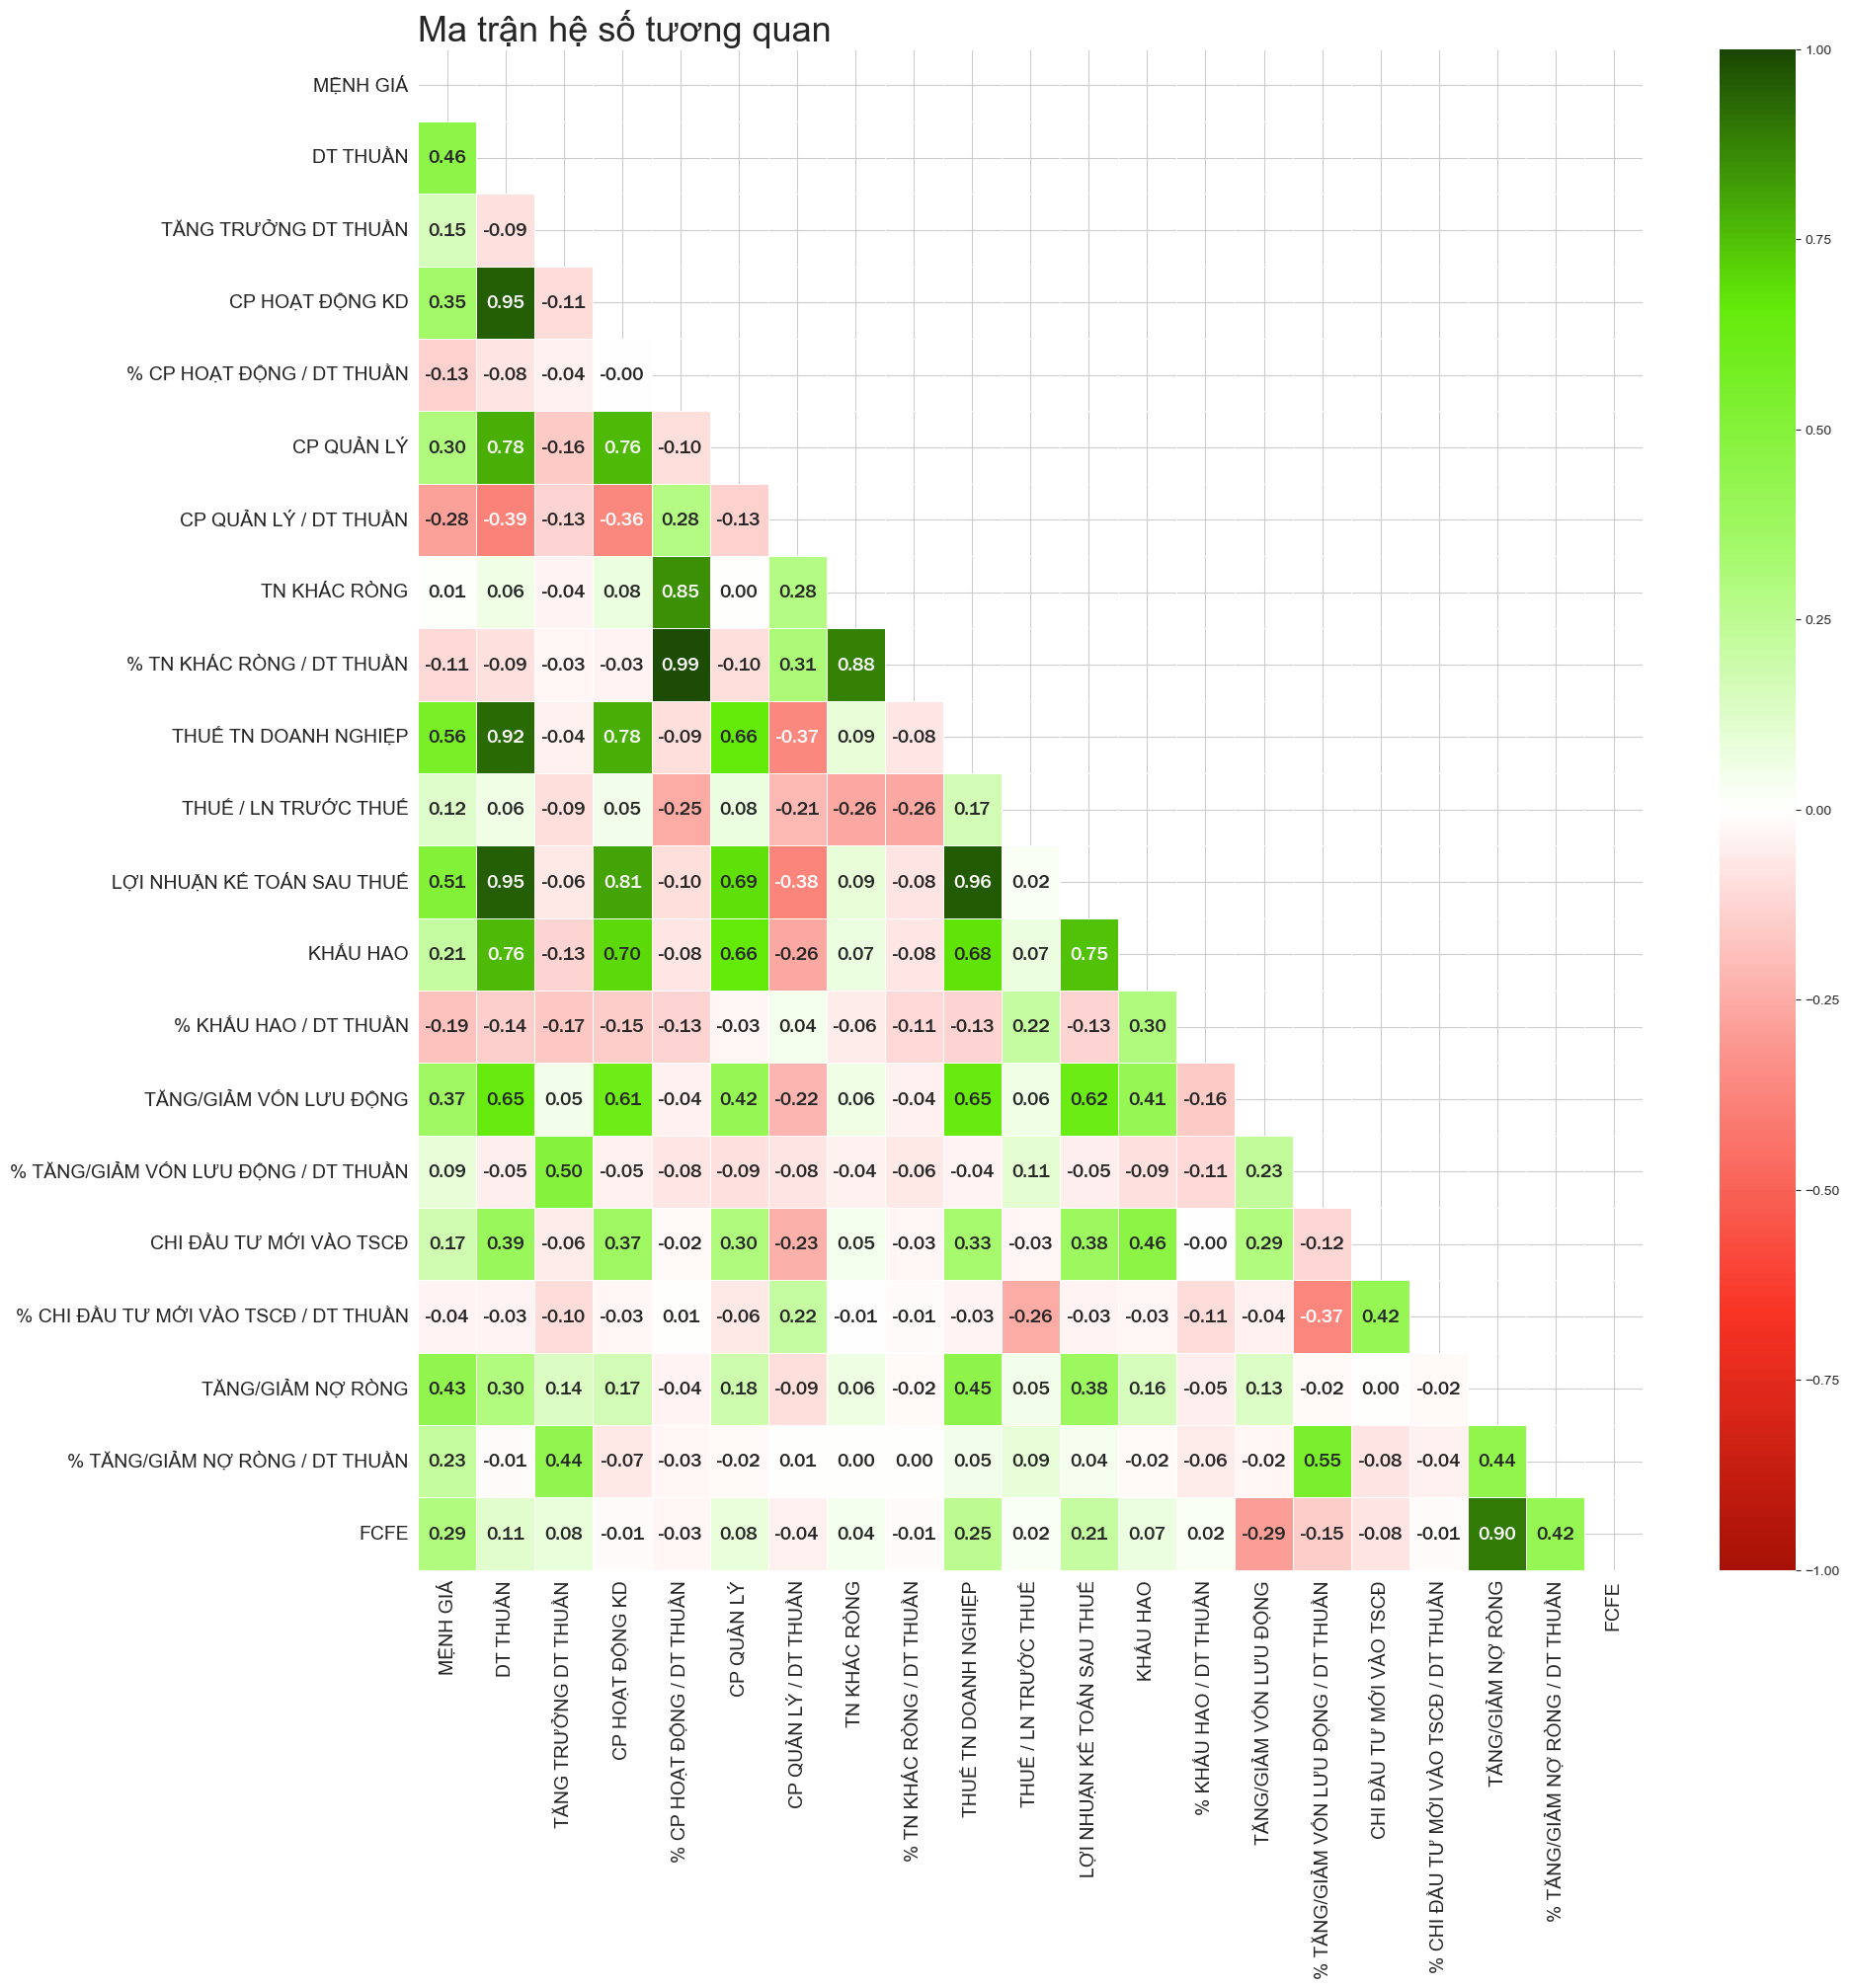

<Figure size 14080x10560 with 0 Axes>

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Tạo colormap tùy chỉnh
cmap = LinearSegmentedColormap.from_list(name='custom', colors=['#A71105'
                                                                ,'#F83324','#FB9189'
                                                                , 'white'
                                                                , '#A7FA6E', '#63EA08'
                                                                ,'#1B4804' ])

fig, ax = plt.subplots(figsize=(20,20))

sns.heatmap(data=corelation,  mask=mask,
            annot=True, annot_kws={"fontsize":14,
                                  "fontname" : "Franklin Gothic Medium"}, fmt=".2f", 
            cmap=cmap,  # Sử dụng colormap tùy chỉnh
            vmin=-1, vmax=1,
            linecolor='white', linewidths=0.5)

yticks = [i.upper() for i in corelation.index]
xticks = [i.upper() for i in corelation.columns]

ax.set_yticklabels(yticks, rotation=0, fontsize=14 )
ax.set_xticklabels(xticks, rotation=90, fontsize=14)
title = "Ma trận hệ số tương quan"
ax.set_title(title, loc='left', fontsize=26)

# Lưu heatmap thành tệp PNG
#output_file_path = 'correlation_matrix.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')

# Hiển thị heatmap (nếu bạn muốn)
plt.figure(dpi=2200)
plt.show()

- Doanh thu thuần (DT Thuần) có mối quan hệ tuyến tính dương mạnh với các chỉ tiêu như chi phí hoạt động kinh doanh (CP hoạt động KD), chi phí quản lý (CP quản lý), thuế thu nhập doanh nghiệp (Thuế TN Doanh nghiệp), lợi nhuận kế toán sau thuế (Lợi nhuận kế toán sau thuế) và khấu hao (Khấu hao). Điều này cho thấy khi doanh thu thuần tăng thì các chỉ tiêu này cũng tăng theo và ngược lại. Đây là một điều dễ hiểu vì các chỉ tiêu này đều phụ thuộc vào doanh thu thuần.

- Tăng trưởng doanh thu thuần (Tăng trưởng DT thuần) có mối quan hệ tuyến tính âm với các chỉ tiêu như chi phí quản lý (CP quản lý), chi phí quản lý trên doanh thu thuần (CP quản lý / DT thuần) và khấu hao trên doanh thu thuần (% Khấu hao / DT thuần). Điều này cho thấy khi tăng trưởng doanh thu thuần tăng thì các chỉ tiêu này giảm và ngược lại. Điều này có thể giải thích bằng việc khi doanh nghiệp có tăng trưởng doanh thu thuần cao thì họ có thể tối ưu hóa chi phí quản lý và khấu hao, từ đó nâng cao hiệu quả kinh doanh.

- Chi phí hoạt động kinh doanh trên doanh thu thuần (% CP hoạt động / DT thuần) và thu nhập khác ròng trên doanh thu thuần (% TN khác ròng / DT thuần) có mối quan hệ tuyến tính dương rất mạnh với nhau (hệ số correlation gần bằng 1). Điều này cho thấy khi một chỉ tiêu tăng thì chỉ tiêu kia cũng tăng theo và ngược lại. Điều này có thể giải thích bằng việc khi doanh nghiệp có chi phí hoạt động kinh doanh cao thì họ cũng có thu nhập khác ròng cao, có thể do họ đầu tư vào các hoạt động ngoài lĩnh vực chính của mình.
